<a href="https://colab.research.google.com/github/SaeedARV/Image-Similarity/blob/main/Roshan_ImageSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕Install dependencies

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf

import os
import PIL
import PIL.Image
import random
import os
import cv2

from tqdm import tqdm

# ⭕Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ⭕Download datasets and convert files to proper format

## Download the data needed for evaluation

In [ ]:
!mkdir /content/drive/MyDrive/dataset

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz

--2023-08-05 13:55:15--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz [following]
--2023-08-05 13:55:15--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/102flowers.tgz.2’

102flowers.tgz.2    100%[===================>] 328.89M  34.4MB/s    in 11s     

2023-08-05 13:55:27 (29.1 MB/s) - ‘/content/drive/MyDrive/dataset/102flowers.tgz.2’ saved [344862509/344862509]



In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz

--2023-07-27 08:12:45--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102segmentations.tgz [following]
--2023-07-27 08:12:46--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102segmentations.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203577493 (194M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/102segmentations.tgz’

102segmentations.tg 100%[===================>] 194.15M  19.3MB/s    in 12s     

2023-07-27 08:12:59 (15.9 MB/s) - ‘/content/drive/MyDrive/dataset/102segmentations.tgz’ saved

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/distancematrices102.mat

--2023-07-27 08:12:59--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/distancematrices102.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/distancematrices102.mat [following]
--2023-07-27 08:13:00--  https://thor.robots.ox.ac.uk/datasets/flowers-102/distancematrices102.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978812286 (1.8G) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/distancematrices102.mat’

distancematrices102 100%[===================>]   1.84G  19.4MB/s    in 98s     

2023-07-27 08:14:39 (19.2 MB/s) - ‘/content/drive/MyDrive/dataset/distancematric

In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2023-07-27 08:14:39--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat [following]
--2023-07-27 08:14:40--  https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502 [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2023-07-27 08:14:40 (47.8 MB/s) - ‘/content/drive/MyDrive/dataset/imagelabels.mat’ saved [502/502]



In [ ]:
!wget -P /content/drive/MyDrive/dataset https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat

--2023-07-27 08:14:40--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/setid.mat [following]
--2023-07-27 08:14:41--  https://thor.robots.ox.ac.uk/datasets/flowers-102/setid.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14989 (15K) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/dataset/setid.mat’

setid.mat           100%[===================>]  14.64K  --.-KB/s    in 0.001s  

2023-07-27 08:14:42 (15.2 MB/s) - ‘/content/drive/MyDrive/dataset/setid.mat’ saved [14989/14989]



## Convert .mat files to .csv

In [ ]:
import scipy.io
import pandas as pd

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/imagelabels.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/imagelabels.csv")

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/setid.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/setid.csv")

In [ ]:
mat = scipy.io.loadmat('/content/drive/MyDrive/dataset/distancematrices102.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("/content/drive/MyDrive/dataset/distancematrices102.csv")

## Extract .tgz files

In [ ]:
import tarfile

In [ ]:
file = tarfile.open('/content/drive/MyDrive/dataset/102flowers.tgz')
file.extractall('/content/drive/MyDrive/dataset/102flowers')
file.close()

In [ ]:
file = tarfile.open('/content/drive/MyDrive/dataset/102segmentations.tgz')
file.extractall('/content/drive/MyDrive/dataset/102segmentations')
file.close()

KeyboardInterrupt: ignored

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)['labels']
labels

0       77
1       77
2       77
3       77
4       77
        ..
8184    62
8185    62
8186    62
8187    62
8188    62
Name: labels, Length: 8189, dtype: int64

# ⭕Visualize the data

## Load labels

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)['labels']
labels

NameError: ignored

## Display several numbers of images and their labels

In [ ]:
sampled_img = random.sample(os.listdir('/content/drive/MyDrive/dataset/102flowers/jpg'), k=5)

for img_name in sampled_img:
  img_number = img_name.split('.')[0].split('_')[1]
  lbl = labels[int(img_number)]
  print("Label of following image:", lbl)
  print()

  img_path = os.path.join('/content/drive/MyDrive/dataset/102flowers/jpg', img_name)
  img = mpimg.imread(img_path)
  fig, ax = plt.subplots(figsize=(3, 3))
  ax.imshow(img)
  ax.axis('off')
  plt.show()

  print()
  print("="*80)


FileNotFoundError: ignored

## Install dependencies

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## load the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/unpreprocessed_data.csv', index_col=0)

In [ ]:
data['label'].value_counts()

False    107519
True      25704
Name: label, dtype: int64

## Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['label'], axis=1).reset_index(drop=True)
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Train several simple model

### 🔵KNN Classifier

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
acc = knn_classifier.score(X_test, y_test)
acc

0.9772189904297242

### 🔵Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
acc = dt_classifier.score(X_test, y_test)
acc

0.999962469506474

### 🔵Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
acc = rf_classifier.score(X_test, y_test)
acc

### 🔵Naive Bayes Classifier

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
acc = nb_classifier.score(X_test, y_test)
acc

0.8844811409270031

# ⭕Train model using ResNet50 with unbalanced dataset

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

from tensorflow.keras import layers, losses, optimizers, metrics
from tqdm import tqdm
from PIL import Image

## Make train and test folders for each class

In [ ]:
# Set the path to the image folder96
image_folder = '/content/drive/MyDrive/dataset/102flowers/jpg'

# Set the desired image size
image_size = (256, 256)

# Create an empty list to store the images
images = []

# Iterate over the files in the image folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):
        # Append the image array to the images list
        images.append(os.path.join(image_folder, filename))

In [ ]:
data = pd.DataFrame({'paths': images})

In [ ]:
data['labels'] = pd.read_csv('/content/drive/MyDrive/dataset/imagelabels.csv', index_col=0)
data

In [ ]:
unique_labels = data['labels'].unique()
random_unique_labels = random.sample(list(unique_labels), k=20)

In [ ]:
random_unique_labels = [15, 82, 14, 73, 20, 24, 62, 69, 89, 7, 41, 16, 12, 50, 70, 71, 90, 53, 81, 21]

In [ ]:
data['labels']

In [ ]:
# Split the DataFrame based on the random unique labels
df_list = [data.query('labels == @label').reset_index(drop=True) for label in random_unique_labels]

# Concatenate the DataFrames along the rows to create a new DataFrame
test_data = pd.concat(df_list, ignore_index=True)

In [ ]:
# Create another DataFrame for the remaining rows
train_data = data.query('labels not in @random_unique_labels').reset_index(drop=True)

In [ ]:
test_data.shape

In [ ]:
train_data.shape

In [ ]:
train_data['labels'].value_counts() # It's unbalanced

In [ ]:
for _, (path, label) in train_data.iterrows():
  # Open the source image using PIL
  image = Image.open(path)

  destination_folder = os.path.join('/content/drive/MyDrive/dataset/102flowers', 'train', str(label))
  # Create the destination folder if it doesn't exist
  os.makedirs(destination_folder, exist_ok=True)

  image_name = path.split('/')[-1]
  destination_image_path = os.path.join(destination_folder, image_name)
  # Save the image to the destination folder
  image.save(destination_image_path)


In [ ]:
for _, (path, label) in test_data.iterrows():
  # Open the source image using PIL
  image = Image.open(path)

  destination_folder = os.path.join('/content/drive/MyDrive/dataset/102flowers', 'test', str(label))
  # Create the destination folder if it doesn't exist
  os.makedirs(destination_folder, exist_ok=True)

  image_name = path.split('/')[-1]
  destination_image_path = os.path.join(destination_folder, image_name)
  # Save the image to the destination folder
  image.save(destination_image_path)

In [ ]:
train_data['labels']

In [ ]:
test_data['labels']

In [ ]:
train_data['labels'].to_csv('/content/drive/MyDrive/dataset/102flowers/train_labels.csv')

In [ ]:
test_data['labels'].to_csv('/content/drive/MyDrive/dataset/102flowers/test_labels.csv')

In [ ]:
!rm -r /content/drive/MyDrive/dataset/102flowers/jpg

## Load and preprocess the train data

In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/dataset/102flowers/train_labels.csv', index_col=0)['labels']

In [ ]:
train_labels

0       77
1       77
2       77
3       77
4       77
        ..
6482    57
6483    57
6484    57
6485    57
6486    57
Name: labels, Length: 6487, dtype: int64

In [ ]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/102flowers/train",
    validation_split=0.2,
    labels=train_labels.to_numpy().tolist(),
    label_mode='int',
    subset='both',
    seed=1337,
    image_size=(256, 256),
    batch_size=32,
)

Found 6487 files belonging to 82 classes.
Using 5190 files for training.
Using 1297 files for validation.


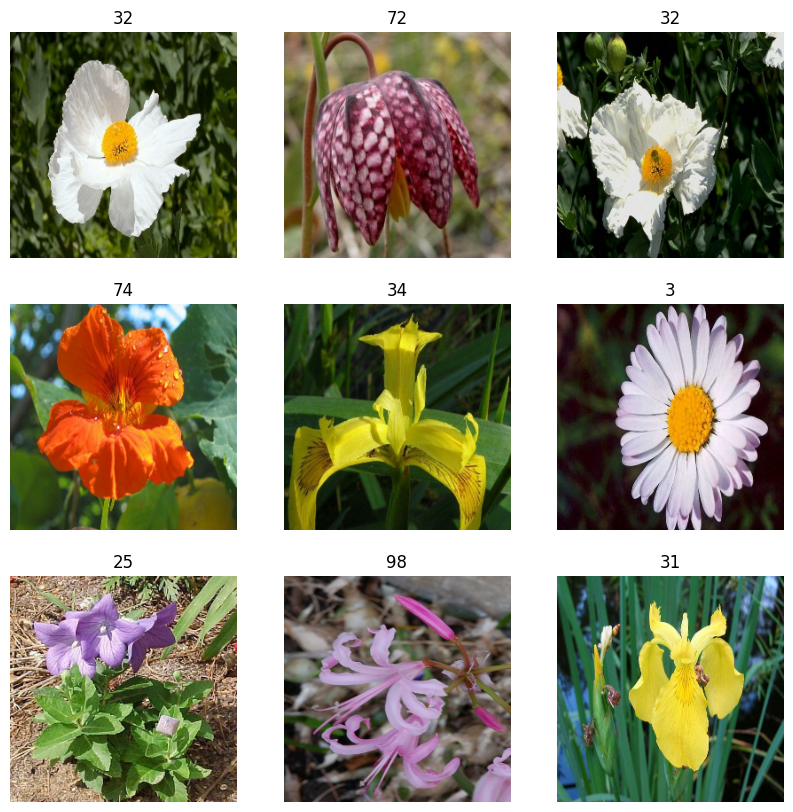

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels[i].numpy())
    plt.axis("off")

In [ ]:
# Normalize the pixel values of the training dataset
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [ ]:
# Convert the original labels to one-hot encoded format with 82 classes
num_classes = 82

train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))

## Make the lfw-like dataset for testing

In [ ]:
base_ds = pd.DataFrame({
    "class_name": [],
})

In [ ]:
for _class in os.listdir('/content/drive/MyDrive/dataset/102flowers/test'):
  for img_name in os.listdir('/content/drive/MyDrive/dataset/102flowers/test/'+_class):
    new_row = {"class_name": _class+'/'+img_name}
    base_ds.loc[len(base_ds)] = new_row
base_ds

,class_name
0,15/image_01567.jpg
1,15/image_01595.jpg
2,15/image_01569.jpg
3,15/image_01501.jpg
4,15/image_01516.jpg
...,...
1697,21/image_02017.jpg
1698,21/image_02164.jpg
1699,21/image_02003.jpg
1700,21/image_02184.jpg


In [ ]:
base_ds['label'] = pd.read_csv('/content/drive/MyDrive/dataset/102flowers/test_labels.csv', index_col=0)
base_ds

,class_name,label
0,15/image_01567.jpg,15
1,15/image_01595.jpg,15
2,15/image_01569.jpg,15
3,15/image_01501.jpg,15
4,15/image_01516.jpg,15
...,...,...
1697,21/image_02017.jpg,21
1698,21/image_02164.jpg,21
1699,21/image_02003.jpg,21
1700,21/image_02184.jpg,21


In [ ]:
test_ds = {}
test_ds['class_name_1'] = []
test_ds['label_1'] = []
test_ds['class_name_2'] = []
test_ds['label_2'] = []

In [ ]:
t = 0
flag = False

# Iterate over all pairs of rows in the original dataframe and make a dictionary out of it, beacouse it's faster
for i in tqdm(range(len(base_ds))):
    for j in range(i+1, len(base_ds)):

        for column in list(test_ds.keys()):
          if t == len(test_ds)/2 and not flag:
            t = 0
            flag = True
          elif t == len(test_ds)/2 and flag:
            t = 0
            flag = False
          if flag:
            test_ds[column].append(base_ds.iloc[j][t])
          else:
            test_ds[column].append(base_ds.iloc[i][t])
          t += 1

100%|██████████| 1702/1702 [05:59<00:00,  4.74it/s]


In [ ]:
len(test_ds['class_name_2'])

1447551

In [ ]:
test_ds = pd.DataFrame(test_ds)
test_ds

,class_name_1,label_1,class_name_2,label_2
0,15/image_01567.jpg,15,15/image_01595.jpg,15
1,15/image_01567.jpg,15,15/image_01569.jpg,15
2,15/image_01567.jpg,15,15/image_01501.jpg,15
3,15/image_01567.jpg,15,15/image_01516.jpg,15
4,15/image_01567.jpg,15,15/image_01589.jpg,15
...,...,...,...,...
1447546,21/image_02164.jpg,21,21/image_02184.jpg,21
1447547,21/image_02164.jpg,21,21/image_02041.jpg,21
1447548,21/image_02003.jpg,21,21/image_02184.jpg,21
1447549,21/image_02003.jpg,21,21/image_02041.jpg,21


In [ ]:
for index, row in tqdm(test_ds.iterrows()):
  test_ds.at[index, 'label'] = (row['label_1'] == row['label_2'])

test_ds

1447551it [01:25, 16870.52it/s]


,class_name_1,label_1,class_name_2,label_2,label
0,15/image_01567.jpg,15,15/image_01595.jpg,15,True
1,15/image_01567.jpg,15,15/image_01569.jpg,15,True
2,15/image_01567.jpg,15,15/image_01501.jpg,15,True
3,15/image_01567.jpg,15,15/image_01516.jpg,15,True
4,15/image_01567.jpg,15,15/image_01589.jpg,15,True
...,...,...,...,...,...
1447546,21/image_02164.jpg,21,21/image_02184.jpg,21,True
1447547,21/image_02164.jpg,21,21/image_02041.jpg,21,True
1447548,21/image_02003.jpg,21,21/image_02184.jpg,21,True
1447549,21/image_02003.jpg,21,21/image_02041.jpg,21,True


In [ ]:
test_ds['label'].value_counts()

In [ ]:
test_ds = test_ds.drop(['label_1', 'label_2'], axis=1)
test_ds

In [ ]:
# Randomly sample false rows from test_ds to balance the dataset
false_data = test_ds[test_ds['label'] == False].sample(n=10000, random_state=42)

In [ ]:
true_data = test_ds[test_ds['label'] == True].sample(n=10000, random_state=42)

In [ ]:
test_ds = pd.concat([false_data, true_data], ignore_index=True)
test_ds

,class_name_1,class_name_2,label
0,70/image_02447.jpg,81/image_07984.jpg,False
1,15/image_01584.jpg,12/image_03264.jpg,False
2,41/image_05470.jpg,90/image_03603.jpg,False
3,62/image_00448.jpg,21/image_02023.jpg,False
4,73/image_07537.jpg,81/image_08141.jpg,False
...,...,...,...
19995,82/image_06938.jpg,82/image_06772.jpg,True
19996,50/image_01535.jpg,50/image_01545.jpg,True
19997,73/image_07364.jpg,73/image_07370.jpg,True
19998,73/image_07392.jpg,73/image_07631.jpg,True


In [ ]:
test_ds['label'].value_counts()

False    10000
True     10000
Name: label, dtype: int64

In [ ]:
test_ds.to_csv('/content/drive/MyDrive/dataset/test_data.csv')

## Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class FixedImageDataGenerator(ImageDataGenerator):
    def standardize(self, x):
        if self.featurewise_center:
            x = (x/255.)
        return x

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = FixedImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    validation_split=0.2,
    rotation_range=20,  # randomly rotate images by 20 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by 10% of the width
    height_shift_range=0.1,  # randomly shift images vertically by 10% of the height
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zoom images
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest'  # fill any newly created pixels after rotation or shifting
)

In [ ]:
train_generator = datagen.flow_from_directory(
                  directory="/content/drive/MyDrive/dataset/102flowers/train",
                  subset='training',
                  target_size=(256, 256), # resize to this size
                  batch_size=32, # number of images to extract from folder for every batch
                  class_mode='categorical', # classes to predict
                  seed=2020 # to make the result reproducible
                  )

Found 5217 images belonging to 82 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
                  directory="/content/drive/MyDrive/dataset/102flowers/train",
                  subset='validation',
                  target_size=(256, 256), # resize to this size
                  batch_size=32, # number of images to extract from folder for every batch
                  class_mode='categorical', # classes to predict
                  seed=2020 # to make the result reproducible
                  )

Found 1270 images belonging to 82 classes.


In [ ]:
len(train_generator)

164

In [ ]:
len(val_generator)

40

## Design the architecture of the model

In [ ]:
num_classes = 82
feature_dims = 2048

In [ ]:
resnet_50 = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet')
resnet_50.trainable=False

In [ ]:
shape = (256, 256, 3)

In [ ]:
def build_model():
    inputs = tf.keras.Input(shape=shape)
    x = resnet_50(inputs)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    features = layers.Dense(feature_dims, activation="relu", name="features")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    return tf.keras.models.Model(inputs, [features, outputs])

In [ ]:
model = build_model()
model.compile(optimizer=optimizers.Adam(learning_rate = 0.001),
              loss=losses.CategoricalCrossentropy(),
              metrics=metrics.CategoricalAccuracy())
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 features (GlobalAveragePool  (None, 2048)             0         
 ing2D)                                                          
                                                                 
 dense_1 (Dense)             (None, 82)                168018    
                                                                 
Total params: 23,755,730
Trainable params: 168,018
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:

for data, target in val_generator:
    print(target.shape)
    break


(32, 82)


In [ ]:
history_no_centerloss = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=32,
)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
model.save('/content/drive/MyDrive/dataset/without-centerloss.h5')

## Train with center-loss

In [ ]:
class CenterLoss(losses.Loss):
    def __init__(self, num_classes, feature_dims, alpha=0.5, reduction=losses.Reduction.AUTO, name='center_loss'):
        super(CenterLoss, self).__init__(reduction=reduction, name=name)

        self.num_classes = num_classes
        self.feature_dims = feature_dims

        # hyper parameter for updating the center point
        self.alpha = alpha

        self.centers = tf.Variable(tf.zeros(shape = (self.num_classes, self.feature_dims)))

    def call(self, y_true, y_pred):
        """
            y_ture : same teacher signal as for classification (1-hot vector)
                     shape = (batch_size, num_classes)
            y_pred : output of features in the middle layer of the model
                     shape = (batch_size, feature_dims)
        """

        labels = tf.argmax(y_true, axis=-1)

        centers_batch = tf.gather(self.centers, labels)

        diff = centers_batch - y_pred

        loss = tf.reduce_mean(tf.square(diff))


        unique_label, unique_idx, unique_count = tf.unique_with_counts(labels)
        appear_times = tf.gather(unique_count, unique_idx)
        appear_times = tf.reshape(appear_times, [-1, 1])

        diff = diff / tf.cast((1 + appear_times), tf.float32)

        diff = self.alpha * diff

        self.centers = tf.compat.v1.scatter_sub(self.centers, labels, diff)

        return loss

In [ ]:
def each_img_distance(y_true, y_pred):
    """
        y_true: true labels (1-hot vector)
        y_pred: predicted labels (output of features in the middle layer)

    """

    centers = center_loss_obj.centers  # Get the centers from center_loss_obj
    labels = tf.argmax(y_true, axis=-1)  # Retrieve the predicted labels by taking the index of the maximum value in y_true
    centers_batch = tf.gather(centers, labels)  # Gather the corresponding centers based on the predicted labels
    distances = tf.norm(y_pred - centers_batch, axis=1)  # Calculate the L2 (Euclidean) distance between y_pred and centers_batch

    return distances

In [ ]:
def average_center_distance(y_true, y_pred):
    """
        y_true: true labels (1-hot vector)
        y_pred: predicted labels (output of features in the middle layer)

    """

    centers = center_loss_obj.centers  # Get the centers from the center_loss_obj
    num_centers = tf.shape(centers)[0]  # Get the number of centers

    # Calculate pairwise Euclidean distances between centers
    tiled_centers = tf.tile(tf.expand_dims(centers, axis=1), [1, num_centers, 1])  # Tile the centers to create pairs
    pairwise_distances = tf.norm(tiled_centers - tf.expand_dims(centers, axis=0), axis=-1)  # Calculate Euclidean distances

    # Exclude self-distances and calculate average distance
    mask = tf.ones([num_centers, num_centers]) - tf.eye(num_centers)  # Create a mask to exclude self-distances
    valid_distances = tf.boolean_mask(pairwise_distances, tf.cast(mask, tf.bool))  # Apply mask to exclude self-distances
    avg_distance = tf.reduce_mean(valid_distances)  # Calculate the average distance

    return avg_distance

In [ ]:
num_classes = 82
feature_dims = 2048

In [ ]:
center_loss_obj = CenterLoss(num_classes, feature_dims)

In [ ]:
model = build_model()
model.compile(optimizer=optimizers.Adam(learning_rate = 0.001),
              loss=[center_loss_obj, losses.CategoricalCrossentropy()],
              metrics=[[each_img_distance, average_center_distance], [metrics.CategoricalAccuracy()]])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 features (Dense)            (None, 2048)              4196352   
                                                                 
 dense (Dense)               (None, 82)                168018    
                                                             

In [ ]:
history_with_centerloss1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    batch_size=32,
)

Epoch 1/5
164/164 [==============================] - 2014s 12s/step - loss: 3.5336 - features_loss: 0.1423 - dense_loss: 3.3912 - features_each_img_distance: 12.8265 - features_average_center_distance: 11.2139 - dense_categorical_accuracy: 0.1965 - val_loss: 4.2126 - val_features_loss: 0.0881 - val_dense_loss: 4.1246 - val_features_each_img_distance: 10.0925 - val_features_average_center_distance: 13.4371 - val_dense_categorical_accuracy: 0.0976
Epoch 2/5
164/164 [==============================] - 136s 832ms/step - loss: 2.5110 - features_loss: 0.1645 - dense_loss: 2.3465 - features_each_img_distance: 14.0050 - features_average_center_distance: 15.0285 - dense_categorical_accuracy: 0.3469 - val_loss: 4.1869 - val_features_loss: 0.1044 - val_dense_loss: 4.0825 - val_features_each_img_distance: 10.9893 - val_features_average_center_distance: 14.8100 - val_dense_categorical_accuracy: 0.1094
Epoch 3/5
164/164 [==============================] - 134s 817ms/step - loss: 2.1234 - features_loss

In [ ]:
resnet_50.trainable = True

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate = 1e-5),
              loss=[center_loss_obj, losses.CategoricalCrossentropy()],
              metrics=[[each_img_distance, average_center_distance], [metrics.CategoricalAccuracy()]])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 features (Dense)            (None, 2048)              4196352   
                                                                 
 dense (Dense)               (None, 82)                168018    
                                                             

In [ ]:
history_with_centerloss2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    batch_size=32,
)

Epoch 1/5
164/164 [==============================] - 201s 929ms/step - loss: 2.2564 - features_loss: 0.1568 - dense_loss: 2.0996 - features_each_img_distance: 13.7710 - features_average_center_distance: 15.4808 - dense_categorical_accuracy: 0.3989 - val_loss: 4.8400 - val_features_loss: 0.1570 - val_dense_loss: 4.6830 - val_features_each_img_distance: 13.5848 - val_features_average_center_distance: 18.6863 - val_dense_categorical_accuracy: 0.1425
Epoch 2/5
164/164 [==============================] - 155s 946ms/step - loss: 1.6038 - features_loss: 0.1673 - dense_loss: 1.4365 - features_each_img_distance: 14.2609 - features_average_center_distance: 17.7511 - dense_categorical_accuracy: 0.5313 - val_loss: 4.7731 - val_features_loss: 0.1536 - val_dense_loss: 4.6196 - val_features_each_img_distance: 13.4383 - val_features_average_center_distance: 18.8809 - val_dense_categorical_accuracy: 0.1504
Epoch 3/5
164/164 [==============================] - 154s 940ms/step - loss: 1.4343 - features_los

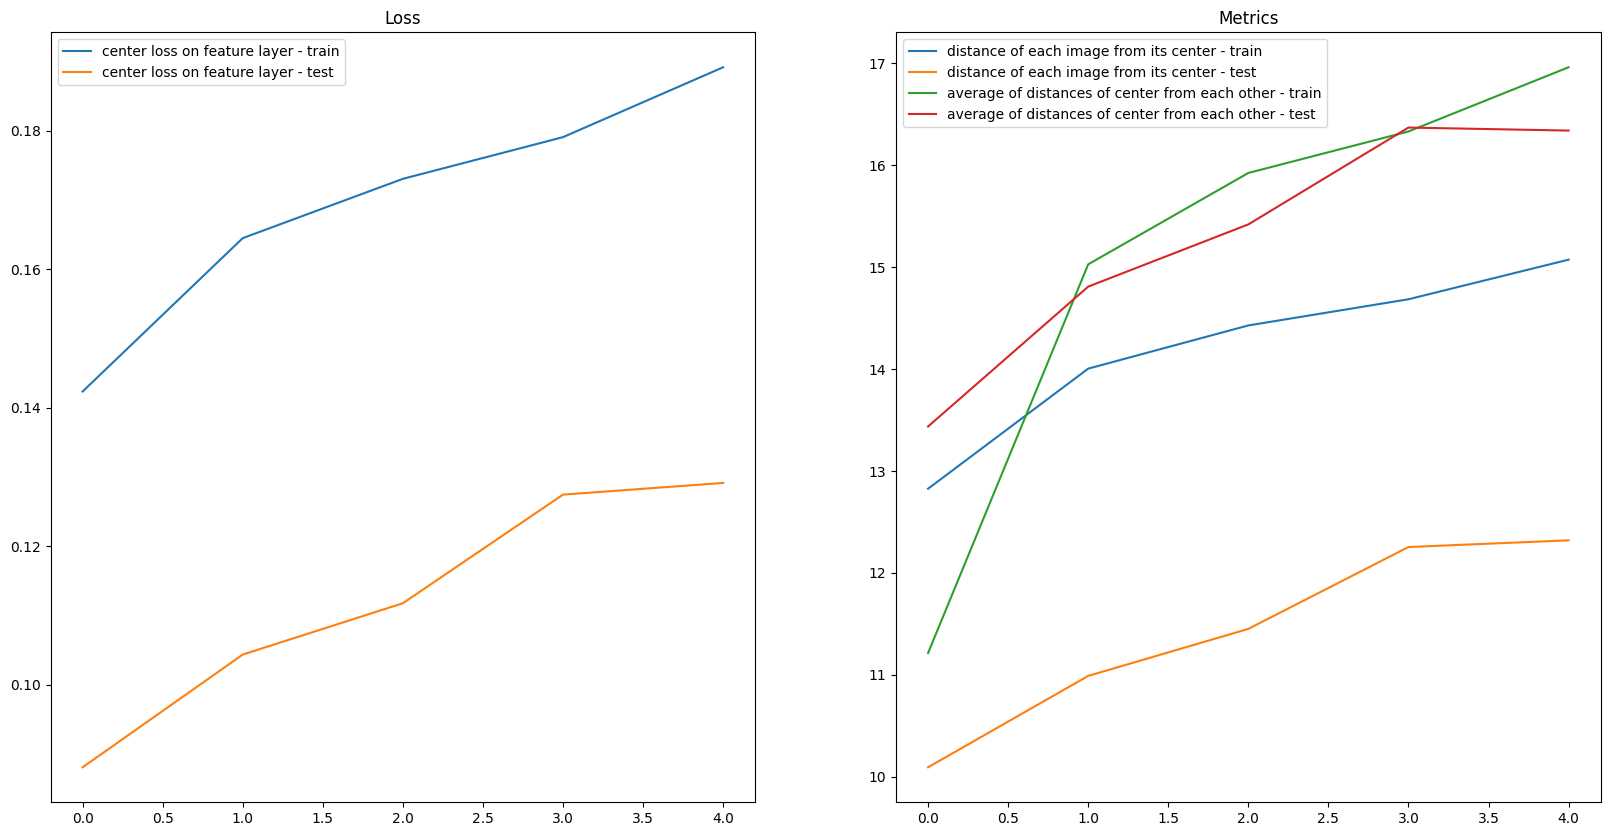

In [ ]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_with_centerloss1.history["features_loss"], label = "center loss on feature layer - train")
ax.plot(history_with_centerloss1.history["val_features_loss"], label = "center loss on feature layer - test")
ax.set_title("Loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_with_centerloss1.history["features_each_img_distance"], label = "distance of each image from its center - train")
ax.plot(history_with_centerloss1.history["val_features_each_img_distance"], label = "distance of each image from its center - test")
ax.plot(history_with_centerloss1.history["features_average_center_distance"], label = "average distance between all the centers - train")
ax.plot(history_with_centerloss1.history["val_features_average_center_distance"], label = "average distance between all the centers - test")
ax.set_title("Metrics")
ax.legend()



In [ ]:
model.save_weights('/content/drive/MyDrive/dataset/with-centerloss.h5')

## Evaluate with center-loss

In [ ]:
num_classes = 82
feature_dims = 2048

In [ ]:
model = build_model()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 features (Dense)            (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 82)                168018    
                                                           

In [ ]:
model.load_weights('/content/drive/MyDrive/dataset/with-centerloss.h5')

In [ ]:
test_ds = pd.read_csv('/content/drive/MyDrive/dataset/test_data.csv', index_col=0)
test_ds

,class_name_1,class_name_2,label
0,70/image_02447.jpg,81/image_07984.jpg,False
1,15/image_01584.jpg,12/image_03264.jpg,False
2,41/image_05470.jpg,90/image_03603.jpg,False
3,62/image_00448.jpg,21/image_02023.jpg,False
4,73/image_07537.jpg,81/image_08141.jpg,False
...,...,...,...
19995,21/image_01934.jpg,21/image_02103.jpg,True
19996,15/image_01605.jpg,15/image_01519.jpg,True
19997,15/image_01530.jpg,15/image_01514.jpg,True
19998,89/image_07826.jpg,89/image_07715.jpg,True


In [ ]:
false_data = test_ds[test_ds['label'] == False].sample(n=500, random_state=42)

In [ ]:
true_data = test_ds[test_ds['label'] == True].sample(n=500, random_state=42)

In [ ]:
test_ds = pd.concat([false_data, true_data], ignore_index=True)
test_ds

,class_name_1,class_name_2,label
0,82/image_06798.jpg,89/image_07721.jpg,False
1,53/image_04827.jpg,81/image_07938.jpg,False
2,82/image_06887.jpg,62/image_00520.jpg,False
3,16/image_01800.jpg,50/image_01613.jpg,False
4,15/image_01616.jpg,12/image_03307.jpg,False
...,...,...,...
995,89/image_07816.jpg,89/image_07946.jpg,True
996,71/image_03649.jpg,71/image_03838.jpg,True
997,62/image_00038.jpg,62/image_00189.jpg,True
998,41/image_05274.jpg,41/image_05500.jpg,True


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics.pairwise import cosine_similarity

# Load the feature extractor model
feature_extractor = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('features').output)

# Initialize variables for true positives, false positives, and false negatives
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
predicted_scores = []
true_labels = []
similarities = []

# Iterate over each row in the dataset
for index, row in tqdm(test_ds.iterrows()):
    # Load and resize the images
    image1 = Image.open('/content/drive/MyDrive/dataset/102flowers/test/'+row['class_name_1']).resize((256, 256))
    image2 = Image.open('/content/drive/MyDrive/dataset/102flowers/test/'+row['class_name_2']).resize((256, 256))

    # Convert the resized images to NumPy arrays
    image1_array = np.array(image1)
    image2_array = np.array(image2)

    # Expand dimensions to match the expected input shape of the model
    image1_input = np.expand_dims(image1_array, axis=0)
    image2_input = np.expand_dims(image2_array, axis=0)

    # Pass the input images to the feature extractor model
    features1 = feature_extractor.predict(image1_input)
    features2 = feature_extractor.predict(image2_input)

    # Calculate the cosine similarity between the features
    similarity = cosine_similarity(features1, features2)[0][0]

    print(similarity)

    similarities.append(similarity)

    # Determine if the images are predicted to be in the same class or not based on a threshold value
    predicted_label = bool(similarity > 0.4)

    # Append predicted score and true label for computing ROC AUC
    predicted_scores.append(predicted_label)
    true_labels.append(row['label'])

    # Compare the predicted label with the true label
    if predicted_label == row['label']:
        if predicted_label:
            true_positives += 1
        else:
            true_negatives += 1
    else:
        if predicted_label:
            false_positives += 1
        else:
            false_negatives += 1

# Calculate precision and recall
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_scores)

# Calculate ROC AUC
roc_auc = roc_auc_score(true_labels, similarities)

0it [00:00, ?it/s]

1/1 [==============================] - 0s 224ms/step


1it [00:10, 10.85s/it]

0.31749433
1/1 [==============================] - 0s 406ms/step


2it [00:13,  5.81s/it]

0.27501234
1/1 [==============================] - 0s 413ms/step


3it [00:15,  4.23s/it]

0.18284468
1/1 [==============================] - 0s 229ms/step


4it [00:17,  3.26s/it]

0.20558852
1/1 [==============================] - 0s 217ms/step


5it [00:19,  2.81s/it]

0.39088905
1/1 [==============================] - 0s 235ms/step


6it [00:20,  2.41s/it]

0.1599391
1/1 [==============================] - 0s 229ms/step


7it [00:22,  2.21s/it]

0.22112791
1/1 [==============================] - 0s 224ms/step


8it [00:24,  2.02s/it]

0.31307948
1/1 [==============================] - 0s 230ms/step


9it [00:26,  1.96s/it]

0.3006796
1/1 [==============================] - 0s 398ms/step


10it [00:28,  2.12s/it]

0.394356
1/1 [==============================] - 0s 303ms/step


11it [00:30,  2.06s/it]

0.42190057
1/1 [==============================] - 0s 226ms/step


12it [00:32,  2.01s/it]

0.40112287
1/1 [==============================] - 0s 225ms/step


13it [00:34,  2.04s/it]

0.4235837
1/1 [==============================] - 0s 223ms/step


14it [00:36,  1.99s/it]

0.42649305
1/1 [==============================] - 0s 241ms/step


15it [00:38,  1.97s/it]

0.44164276
1/1 [==============================] - 0s 233ms/step


16it [00:40,  1.92s/it]

0.2780965
1/1 [==============================] - 0s 407ms/step


17it [00:42,  2.03s/it]

0.12963234
1/1 [==============================] - 0s 321ms/step


18it [00:44,  2.02s/it]

0.40071893
1/1 [==============================] - 0s 219ms/step


19it [00:46,  1.92s/it]

0.11287274
1/1 [==============================] - 0s 229ms/step


20it [00:48,  1.93s/it]

0.3227617
1/1 [==============================] - 0s 216ms/step


21it [00:50,  1.93s/it]

0.3054111
1/1 [==============================] - 0s 224ms/step


22it [00:52,  1.98s/it]

0.47798163
1/1 [==============================] - 0s 223ms/step


23it [00:54,  2.02s/it]

0.32239634
1/1 [==============================] - 0s 390ms/step


24it [00:57,  2.28s/it]

0.29610187
1/1 [==============================] - 0s 222ms/step


25it [00:59,  2.17s/it]

0.1851607
1/1 [==============================] - 0s 216ms/step


26it [01:00,  2.09s/it]

0.24921995
1/1 [==============================] - 0s 221ms/step


27it [01:02,  2.01s/it]

0.14076181
1/1 [==============================] - 0s 228ms/step


28it [01:04,  1.95s/it]

0.14169416
1/1 [==============================] - 0s 221ms/step


29it [01:06,  1.91s/it]

0.37417212
1/1 [==============================] - 0s 234ms/step


30it [01:07,  1.74s/it]

0.168185
1/1 [==============================] - 0s 396ms/step


31it [01:10,  2.00s/it]

0.22082356
1/1 [==============================] - 0s 226ms/step


32it [01:12,  1.99s/it]

0.33569762
1/1 [==============================] - 0s 222ms/step


33it [01:14,  2.01s/it]

0.35504985
1/1 [==============================] - 0s 225ms/step


34it [01:16,  1.98s/it]

0.4466782
1/1 [==============================] - 0s 223ms/step


35it [01:17,  1.78s/it]

0.17771937
1/1 [==============================] - 0s 220ms/step


36it [01:19,  1.80s/it]

0.3347771
1/1 [==============================] - 0s 252ms/step


37it [01:21,  1.81s/it]

0.18397906
1/1 [==============================] - 0s 387ms/step


38it [01:23,  2.08s/it]

0.2414872
1/1 [==============================] - 0s 221ms/step


39it [01:25,  2.04s/it]

0.21620259
1/1 [==============================] - 0s 220ms/step


40it [01:27,  1.97s/it]

0.32065588
1/1 [==============================] - 0s 219ms/step


41it [01:29,  1.99s/it]

0.39379758
1/1 [==============================] - 0s 219ms/step


42it [01:31,  1.99s/it]

0.28831595
1/1 [==============================] - 0s 222ms/step


43it [01:33,  2.02s/it]

0.45438713
1/1 [==============================] - 0s 427ms/step


44it [01:36,  2.10s/it]

0.35949075
1/1 [==============================] - 0s 418ms/step


45it [01:38,  2.33s/it]

0.27578115
1/1 [==============================] - 0s 222ms/step


46it [01:40,  2.20s/it]

0.35268205
1/1 [==============================] - 0s 218ms/step


47it [01:43,  2.30s/it]

0.2765718
1/1 [==============================] - 0s 224ms/step


48it [01:45,  2.11s/it]

0.3143402
1/1 [==============================] - 0s 220ms/step


49it [01:47,  2.09s/it]

0.31257093
1/1 [==============================] - 0s 230ms/step


50it [01:48,  1.93s/it]

0.5196568
1/1 [==============================] - 0s 411ms/step


51it [01:51,  2.09s/it]

0.20841116
1/1 [==============================] - 0s 401ms/step


52it [01:53,  2.06s/it]

0.5350158
1/1 [==============================] - 0s 232ms/step


53it [01:54,  1.90s/it]

0.40588808
1/1 [==============================] - 0s 221ms/step


54it [01:56,  1.89s/it]

0.49562114
1/1 [==============================] - 0s 229ms/step


55it [01:57,  1.70s/it]

0.2925489
1/1 [==============================] - 0s 226ms/step


56it [01:59,  1.76s/it]

0.45454454
1/1 [==============================] - 0s 223ms/step


57it [02:01,  1.81s/it]

0.19910553
1/1 [==============================] - 0s 323ms/step


58it [02:03,  1.91s/it]

0.2601946
1/1 [==============================] - 0s 393ms/step


59it [02:06,  2.08s/it]

0.16596656
1/1 [==============================] - 0s 232ms/step


60it [02:08,  2.10s/it]

0.25467074
1/1 [==============================] - 0s 218ms/step


61it [02:09,  1.84s/it]

0.16641663
1/1 [==============================] - 0s 219ms/step


62it [02:11,  1.78s/it]

0.48433214
1/1 [==============================] - 0s 237ms/step


63it [02:12,  1.66s/it]

0.163777
1/1 [==============================] - 0s 227ms/step


64it [02:14,  1.71s/it]

0.40416592
1/1 [==============================] - 0s 241ms/step


65it [02:16,  1.75s/it]

0.16647568
1/1 [==============================] - 0s 412ms/step


66it [02:18,  1.94s/it]

0.18643743
1/1 [==============================] - 0s 215ms/step


67it [02:21,  2.06s/it]

0.34533042
1/1 [==============================] - 0s 219ms/step


68it [02:23,  2.10s/it]

0.70594156
1/1 [==============================] - 0s 220ms/step


69it [02:25,  2.03s/it]

0.35553747
1/1 [==============================] - 0s 234ms/step


70it [02:26,  1.83s/it]

0.33276513
1/1 [==============================] - 0s 228ms/step


71it [02:28,  1.83s/it]

0.17181219
1/1 [==============================] - 0s 219ms/step


72it [02:29,  1.78s/it]

0.31589603
1/1 [==============================] - 0s 402ms/step


73it [02:32,  2.08s/it]

0.15258943
1/1 [==============================] - 0s 218ms/step


74it [02:34,  2.07s/it]

0.13614011
1/1 [==============================] - 0s 221ms/step


75it [02:36,  2.01s/it]

0.40356314
1/1 [==============================] - 0s 220ms/step


76it [02:38,  1.97s/it]

0.25703222
1/1 [==============================] - 0s 236ms/step


77it [02:40,  1.89s/it]

0.33624518
1/1 [==============================] - 0s 407ms/step


78it [02:42,  1.99s/it]

0.29206878
1/1 [==============================] - 0s 222ms/step


79it [02:44,  1.98s/it]

0.14480475
1/1 [==============================] - 0s 378ms/step


80it [02:46,  2.04s/it]

0.30615234
1/1 [==============================] - 0s 218ms/step


81it [02:48,  2.05s/it]

0.41123414
1/1 [==============================] - 0s 234ms/step


82it [02:50,  2.01s/it]

0.21349317
1/1 [==============================] - 0s 219ms/step


83it [02:51,  1.77s/it]

0.29382837
1/1 [==============================] - 0s 218ms/step


84it [02:53,  1.76s/it]

0.2764158
1/1 [==============================] - 0s 225ms/step


85it [02:55,  1.74s/it]

0.2953229
1/1 [==============================] - 0s 222ms/step


86it [02:57,  1.83s/it]

0.33117563
1/1 [==============================] - 0s 422ms/step


87it [02:59,  1.96s/it]

0.34458518
1/1 [==============================] - 0s 394ms/step


88it [03:01,  1.98s/it]

0.37546584
1/1 [==============================] - 0s 229ms/step


89it [03:02,  1.80s/it]

0.26472968
1/1 [==============================] - 0s 222ms/step


90it [03:04,  1.86s/it]

0.27984133
1/1 [==============================] - 0s 227ms/step


91it [03:06,  1.91s/it]

0.35334358
1/1 [==============================] - 0s 235ms/step


92it [03:08,  1.86s/it]

0.26476246
1/1 [==============================] - 0s 226ms/step


93it [03:10,  1.91s/it]

0.33251745
1/1 [==============================] - 0s 409ms/step


94it [03:13,  2.07s/it]

0.41356045
1/1 [==============================] - 0s 395ms/step


95it [03:15,  2.23s/it]

0.21687452
1/1 [==============================] - 0s 225ms/step


96it [03:17,  2.12s/it]

0.19530787
1/1 [==============================] - 0s 225ms/step


97it [03:19,  2.09s/it]

0.12224132
1/1 [==============================] - 0s 228ms/step


98it [03:20,  1.84s/it]

0.4464526
1/1 [==============================] - 0s 218ms/step


99it [03:22,  1.86s/it]

0.39250728
1/1 [==============================] - 0s 219ms/step


100it [03:24,  1.83s/it]

0.24424386
1/1 [==============================] - 0s 401ms/step


101it [03:27,  2.06s/it]

0.2011214
1/1 [==============================] - 1s 1s/step


102it [03:30,  2.56s/it]

0.34531382
1/1 [==============================] - 0s 214ms/step


103it [03:32,  2.41s/it]

0.50642586
1/1 [==============================] - 0s 218ms/step


104it [03:34,  2.17s/it]

0.13295873
1/1 [==============================] - 0s 235ms/step


105it [03:36,  2.07s/it]

0.59672415
1/1 [==============================] - 0s 234ms/step


106it [03:38,  2.00s/it]

0.37773764
1/1 [==============================] - 0s 223ms/step


107it [03:39,  1.74s/it]

0.28895456
1/1 [==============================] - 0s 403ms/step


108it [03:41,  1.80s/it]

0.41371524
1/1 [==============================] - 0s 404ms/step


109it [03:43,  1.98s/it]

0.44932896
1/1 [==============================] - 0s 230ms/step


110it [03:45,  1.96s/it]

0.23280135
1/1 [==============================] - 0s 219ms/step


111it [03:47,  1.92s/it]

0.41855544
1/1 [==============================] - 0s 225ms/step


112it [03:49,  1.90s/it]

0.15976049
1/1 [==============================] - 0s 226ms/step


113it [03:51,  1.90s/it]

0.38467434
1/1 [==============================] - 0s 222ms/step


114it [03:53,  1.90s/it]

0.17932013
1/1 [==============================] - 0s 379ms/step


115it [03:55,  1.90s/it]

0.5388665
1/1 [==============================] - 0s 382ms/step


116it [03:57,  1.98s/it]

0.24677256
1/1 [==============================] - 0s 387ms/step


117it [03:58,  1.90s/it]

0.15030304
1/1 [==============================] - 0s 224ms/step


118it [04:00,  1.89s/it]

0.1505248
1/1 [==============================] - 0s 218ms/step


119it [04:02,  1.70s/it]

0.27760822
1/1 [==============================] - 0s 468ms/step


120it [04:04,  2.03s/it]

0.3926923
1/1 [==============================] - 0s 248ms/step


121it [04:06,  1.84s/it]

0.4741694
1/1 [==============================] - 0s 217ms/step


122it [04:07,  1.81s/it]

0.34245
1/1 [==============================] - 0s 403ms/step


123it [04:10,  2.02s/it]

0.50625765
1/1 [==============================] - 0s 405ms/step


124it [04:12,  2.06s/it]

0.33475038
1/1 [==============================] - 0s 222ms/step


125it [04:13,  1.81s/it]

0.22774373
1/1 [==============================] - 0s 219ms/step


126it [04:15,  1.88s/it]

0.31495392
1/1 [==============================] - 0s 223ms/step


127it [04:17,  1.87s/it]

0.2750132
1/1 [==============================] - 0s 228ms/step


128it [04:18,  1.66s/it]

0.26785383
1/1 [==============================] - 0s 230ms/step


129it [04:20,  1.53s/it]

0.28234777
1/1 [==============================] - 0s 233ms/step


130it [04:21,  1.39s/it]

0.15922277
1/1 [==============================] - 0s 313ms/step


131it [04:23,  1.55s/it]

0.14099431
1/1 [==============================] - 0s 391ms/step


132it [04:25,  1.82s/it]

0.2608251
1/1 [==============================] - 0s 223ms/step


133it [04:27,  1.80s/it]

0.5382869
1/1 [==============================] - 0s 223ms/step


134it [04:29,  1.79s/it]

0.47369462
1/1 [==============================] - 0s 224ms/step


135it [04:30,  1.81s/it]

0.12406978
1/1 [==============================] - 0s 223ms/step


136it [04:32,  1.74s/it]

0.17600581
1/1 [==============================] - 0s 218ms/step


137it [04:34,  1.81s/it]

0.20124264
1/1 [==============================] - 0s 223ms/step


138it [04:36,  1.75s/it]

0.36851317
1/1 [==============================] - 0s 387ms/step


139it [04:38,  2.00s/it]

0.49088424
1/1 [==============================] - 0s 230ms/step


140it [04:41,  2.12s/it]

0.4165355
1/1 [==============================] - 0s 222ms/step


141it [04:42,  2.04s/it]

0.32547837
1/1 [==============================] - 0s 224ms/step


142it [04:44,  1.94s/it]

0.5414361
1/1 [==============================] - 0s 228ms/step


143it [04:46,  1.98s/it]

0.3909336
1/1 [==============================] - 0s 218ms/step


144it [04:48,  1.91s/it]

0.5016386
1/1 [==============================] - 0s 225ms/step


145it [04:50,  1.90s/it]

0.2154729
1/1 [==============================] - 0s 392ms/step


146it [04:52,  2.07s/it]

0.13079464
1/1 [==============================] - 0s 219ms/step


147it [04:54,  1.98s/it]

0.37352312
1/1 [==============================] - 0s 218ms/step


148it [04:55,  1.71s/it]

0.22889492
1/1 [==============================] - 0s 240ms/step


149it [04:57,  1.75s/it]

0.3857211
1/1 [==============================] - 0s 225ms/step


150it [04:58,  1.66s/it]

0.48148367
1/1 [==============================] - 0s 218ms/step


151it [05:00,  1.69s/it]

0.3466822
1/1 [==============================] - 0s 229ms/step


152it [05:02,  1.72s/it]

0.14969404
1/1 [==============================] - 0s 219ms/step


153it [05:03,  1.63s/it]

0.63809997
1/1 [==============================] - 0s 389ms/step


154it [05:06,  1.80s/it]

0.49239558
1/1 [==============================] - 0s 410ms/step


155it [05:07,  1.80s/it]

0.41184843
1/1 [==============================] - 0s 235ms/step


156it [05:09,  1.81s/it]

0.28571704
1/1 [==============================] - 0s 222ms/step


157it [05:11,  1.69s/it]

0.33191907
1/1 [==============================] - 0s 220ms/step


158it [05:13,  1.78s/it]

0.24534944
1/1 [==============================] - 0s 397ms/step


159it [05:15,  1.94s/it]

0.42860186
1/1 [==============================] - 0s 389ms/step


160it [05:17,  1.86s/it]

0.43290606
1/1 [==============================] - 0s 385ms/step


161it [05:19,  1.89s/it]

0.24269225
1/1 [==============================] - 0s 405ms/step


162it [05:21,  2.11s/it]

0.31829613
1/1 [==============================] - 0s 223ms/step


163it [05:22,  1.84s/it]

0.3487187
1/1 [==============================] - 0s 215ms/step


164it [05:25,  1.92s/it]

0.20371917
1/1 [==============================] - 0s 222ms/step


165it [05:26,  1.90s/it]

0.3361764
1/1 [==============================] - 0s 225ms/step


166it [05:29,  2.00s/it]

0.1861375
1/1 [==============================] - 0s 223ms/step


167it [05:31,  1.99s/it]

0.18535058
1/1 [==============================] - 0s 391ms/step


168it [05:33,  2.13s/it]

0.6044961
1/1 [==============================] - 0s 424ms/step


169it [05:35,  2.15s/it]

0.39610803
1/1 [==============================] - 0s 243ms/step


170it [05:37,  2.04s/it]

0.3382537
1/1 [==============================] - 0s 228ms/step


171it [05:39,  1.94s/it]

0.26646915
1/1 [==============================] - 0s 220ms/step


172it [05:40,  1.86s/it]

0.23440132
1/1 [==============================] - 0s 234ms/step


173it [05:42,  1.86s/it]

0.39447445
1/1 [==============================] - 0s 240ms/step


174it [05:44,  1.84s/it]

0.19326586
1/1 [==============================] - 0s 404ms/step


175it [05:47,  2.09s/it]

0.08610236
1/1 [==============================] - 0s 401ms/step


176it [05:50,  2.32s/it]

0.2879365
1/1 [==============================] - 0s 231ms/step


177it [05:51,  2.13s/it]

0.37529647
1/1 [==============================] - 0s 229ms/step


178it [05:53,  2.13s/it]

0.26805058
1/1 [==============================] - 0s 236ms/step


179it [05:55,  2.08s/it]

0.11511399
1/1 [==============================] - 0s 234ms/step


180it [05:58,  2.12s/it]

0.23986721
1/1 [==============================] - 0s 235ms/step


181it [05:59,  2.04s/it]

0.21079051
1/1 [==============================] - 0s 409ms/step


182it [06:01,  1.80s/it]

0.1543707
1/1 [==============================] - 0s 406ms/step


183it [06:03,  2.03s/it]

0.33909076
1/1 [==============================] - 0s 223ms/step


184it [06:05,  2.00s/it]

0.308021
1/1 [==============================] - 0s 222ms/step


185it [06:07,  1.99s/it]

0.6468982
1/1 [==============================] - 0s 220ms/step


186it [06:09,  1.94s/it]

0.36344072
1/1 [==============================] - 0s 227ms/step


187it [06:10,  1.73s/it]

0.25127274
1/1 [==============================] - 0s 235ms/step


188it [06:11,  1.57s/it]

0.21914542
1/1 [==============================] - 0s 215ms/step


189it [06:13,  1.68s/it]

0.13130718
1/1 [==============================] - 0s 415ms/step


190it [06:15,  1.71s/it]

0.2861694
1/1 [==============================] - 0s 424ms/step


191it [06:17,  1.78s/it]

0.324701
1/1 [==============================] - 0s 233ms/step


192it [06:18,  1.65s/it]

0.715875
1/1 [==============================] - 0s 216ms/step


193it [06:21,  1.79s/it]

0.13101634
1/1 [==============================] - 0s 223ms/step


194it [06:22,  1.82s/it]

0.27721956
1/1 [==============================] - 0s 235ms/step


195it [06:24,  1.69s/it]

0.31098226
1/1 [==============================] - 0s 229ms/step


196it [06:26,  1.75s/it]

0.46603417
1/1 [==============================] - 0s 223ms/step


197it [06:27,  1.63s/it]

0.4104319
1/1 [==============================] - 0s 405ms/step


198it [06:30,  1.91s/it]

0.27957717
1/1 [==============================] - 0s 399ms/step


199it [06:31,  1.86s/it]

0.41312128
1/1 [==============================] - 0s 222ms/step


200it [06:33,  1.68s/it]

0.36296484
1/1 [==============================] - 0s 222ms/step


201it [06:34,  1.55s/it]

0.1773639
1/1 [==============================] - 0s 219ms/step


202it [06:36,  1.60s/it]

0.39809334
1/1 [==============================] - 0s 228ms/step


203it [06:38,  1.77s/it]

0.6013253
1/1 [==============================] - 0s 246ms/step


204it [06:39,  1.62s/it]

0.22260304
1/1 [==============================] - 0s 226ms/step


205it [06:41,  1.73s/it]

0.18456629
1/1 [==============================] - 0s 393ms/step


206it [06:44,  2.05s/it]

0.40251344
1/1 [==============================] - 0s 256ms/step


207it [06:46,  2.01s/it]

0.23123398
1/1 [==============================] - 0s 235ms/step


208it [06:47,  1.75s/it]

0.20645538
1/1 [==============================] - 0s 232ms/step


209it [06:49,  1.79s/it]

0.44681937
1/1 [==============================] - 0s 211ms/step


210it [06:50,  1.75s/it]

0.36038792
1/1 [==============================] - 0s 223ms/step


211it [06:52,  1.57s/it]

0.1068407
1/1 [==============================] - 0s 215ms/step


212it [06:53,  1.62s/it]

0.2006571
1/1 [==============================] - 0s 225ms/step


213it [06:55,  1.72s/it]

0.09163754
1/1 [==============================] - 0s 395ms/step


214it [06:58,  1.94s/it]

0.34627944
1/1 [==============================] - 0s 219ms/step


215it [07:00,  1.91s/it]

0.13639927
1/1 [==============================] - 0s 218ms/step


216it [07:01,  1.69s/it]

0.36633533
1/1 [==============================] - 0s 218ms/step


217it [07:02,  1.73s/it]

0.42487013
1/1 [==============================] - 0s 228ms/step


218it [07:03,  1.41s/it]

0.1472201
1/1 [==============================] - 0s 234ms/step


219it [07:05,  1.56s/it]

0.11606536
1/1 [==============================] - 0s 219ms/step


220it [07:06,  1.51s/it]

0.21991257
1/1 [==============================] - 0s 235ms/step


221it [07:08,  1.44s/it]

0.23149423
1/1 [==============================] - 0s 219ms/step


222it [07:08,  1.19s/it]

0.33360723
1/1 [==============================] - 0s 401ms/step


223it [07:10,  1.32s/it]

0.20986784
1/1 [==============================] - 0s 395ms/step


224it [07:13,  1.76s/it]

0.15346605
1/1 [==============================] - 0s 243ms/step


225it [07:15,  1.81s/it]

0.22818327
1/1 [==============================] - 0s 225ms/step


226it [07:16,  1.70s/it]

0.45169577
1/1 [==============================] - 0s 223ms/step


227it [07:18,  1.75s/it]

0.11969207
1/1 [==============================] - 0s 222ms/step


228it [07:20,  1.78s/it]

0.24670419
1/1 [==============================] - 0s 220ms/step


229it [07:21,  1.67s/it]

0.72067785
1/1 [==============================] - 0s 262ms/step


230it [07:23,  1.71s/it]

0.3490162
1/1 [==============================] - 0s 394ms/step


231it [07:25,  1.80s/it]

0.19027624
1/1 [==============================] - 0s 403ms/step


232it [07:27,  1.81s/it]

0.26984408
1/1 [==============================] - 0s 226ms/step


233it [07:29,  1.94s/it]

0.5973865
1/1 [==============================] - 0s 218ms/step


234it [07:30,  1.74s/it]

0.35558373
1/1 [==============================] - 0s 243ms/step


235it [07:31,  1.43s/it]

0.21212968
1/1 [==============================] - 0s 220ms/step


236it [07:33,  1.44s/it]

0.44201374
1/1 [==============================] - 0s 219ms/step


237it [07:34,  1.53s/it]

0.20146206
1/1 [==============================] - 0s 229ms/step


238it [07:36,  1.55s/it]

0.20795041
1/1 [==============================] - 0s 399ms/step


239it [07:39,  1.87s/it]

0.15989187
1/1 [==============================] - 0s 393ms/step


240it [07:41,  2.02s/it]

0.2822092
1/1 [==============================] - 0s 225ms/step


241it [07:43,  1.96s/it]

0.1365048
1/1 [==============================] - 0s 237ms/step


242it [07:44,  1.74s/it]

0.43981493
1/1 [==============================] - 0s 233ms/step


243it [07:46,  1.84s/it]

0.36808118
1/1 [==============================] - 0s 245ms/step


244it [07:48,  1.84s/it]

0.2918322
1/1 [==============================] - 0s 404ms/step


245it [07:51,  2.18s/it]

0.38506046
1/1 [==============================] - 0s 483ms/step


246it [07:52,  1.88s/it]

0.34362897
1/1 [==============================] - 0s 402ms/step


247it [07:55,  2.08s/it]

0.3540043
1/1 [==============================] - 0s 231ms/step


248it [07:56,  1.99s/it]

0.4566433
1/1 [==============================] - 0s 225ms/step


249it [07:58,  1.80s/it]

0.18756121
1/1 [==============================] - 0s 230ms/step


250it [07:59,  1.77s/it]

0.26770684
1/1 [==============================] - 0s 222ms/step


251it [08:01,  1.71s/it]

0.5782708
1/1 [==============================] - 0s 228ms/step


252it [08:02,  1.40s/it]

0.29210347
1/1 [==============================] - 0s 236ms/step


253it [08:04,  1.58s/it]

0.46928424
1/1 [==============================] - 0s 220ms/step


254it [08:04,  1.34s/it]

0.32868809
1/1 [==============================] - 0s 397ms/step


255it [08:07,  1.77s/it]

0.22455917
1/1 [==============================] - 0s 263ms/step


256it [08:10,  1.96s/it]

0.18475547
1/1 [==============================] - 0s 232ms/step


257it [08:11,  1.76s/it]

0.25844923
1/1 [==============================] - 0s 233ms/step


258it [08:12,  1.42s/it]

0.3013733
1/1 [==============================] - 0s 227ms/step


259it [08:13,  1.51s/it]

0.58202064
1/1 [==============================] - 0s 220ms/step


260it [08:15,  1.49s/it]

0.28297162
1/1 [==============================] - 0s 214ms/step


261it [08:17,  1.58s/it]

0.30254936
1/1 [==============================] - 0s 218ms/step


262it [08:18,  1.47s/it]

0.20312628
1/1 [==============================] - 0s 289ms/step


263it [08:20,  1.60s/it]

0.36067957
1/1 [==============================] - 0s 389ms/step


264it [08:22,  1.83s/it]

0.30077982
1/1 [==============================] - 0s 322ms/step


265it [08:24,  1.77s/it]

0.31026673
1/1 [==============================] - 0s 230ms/step


266it [08:25,  1.70s/it]

0.30172852
1/1 [==============================] - 0s 233ms/step


267it [08:27,  1.60s/it]

0.2260414
1/1 [==============================] - 0s 397ms/step


268it [08:28,  1.64s/it]

0.25523233
1/1 [==============================] - 0s 232ms/step


269it [08:30,  1.74s/it]

0.22533627
1/1 [==============================] - 0s 218ms/step


270it [08:32,  1.83s/it]

0.31096283
1/1 [==============================] - 0s 248ms/step


271it [08:33,  1.62s/it]

0.41595507
1/1 [==============================] - 0s 416ms/step


272it [08:36,  1.83s/it]

0.34322205
1/1 [==============================] - 0s 225ms/step


273it [08:38,  1.91s/it]

0.34104317
1/1 [==============================] - 0s 229ms/step


274it [08:40,  1.95s/it]

0.17463863
1/1 [==============================] - 0s 218ms/step


275it [08:41,  1.72s/it]

0.18449387
1/1 [==============================] - 0s 221ms/step


276it [08:42,  1.56s/it]

0.21499127
1/1 [==============================] - 0s 219ms/step


277it [08:44,  1.62s/it]

0.20691694
1/1 [==============================] - 0s 236ms/step


278it [08:45,  1.54s/it]

0.19370767
1/1 [==============================] - 0s 225ms/step


279it [08:47,  1.57s/it]

0.28925273
1/1 [==============================] - 0s 401ms/step


280it [08:49,  1.69s/it]

0.4517184
1/1 [==============================] - 0s 224ms/step


281it [08:51,  1.89s/it]

0.24186316
1/1 [==============================] - 0s 218ms/step


282it [08:53,  1.84s/it]

0.29940966
1/1 [==============================] - 0s 232ms/step


283it [08:54,  1.67s/it]

0.14992082
1/1 [==============================] - 0s 239ms/step


284it [08:56,  1.70s/it]

0.37907526
1/1 [==============================] - 0s 237ms/step


285it [08:57,  1.56s/it]

0.15756449
1/1 [==============================] - 0s 212ms/step


286it [08:58,  1.45s/it]

0.18622339
1/1 [==============================] - 0s 232ms/step


287it [09:00,  1.39s/it]

0.32458195
1/1 [==============================] - 0s 230ms/step


288it [09:01,  1.34s/it]

0.10932842
1/1 [==============================] - 0s 405ms/step


289it [09:02,  1.38s/it]

0.49846175
1/1 [==============================] - 0s 408ms/step


290it [09:05,  1.79s/it]

0.4218127
1/1 [==============================] - 0s 262ms/step


291it [09:06,  1.60s/it]

0.37439027
1/1 [==============================] - 0s 219ms/step


292it [09:08,  1.49s/it]

0.13508898
1/1 [==============================] - 0s 220ms/step


293it [09:09,  1.46s/it]

0.2627804
1/1 [==============================] - 0s 234ms/step


294it [09:10,  1.41s/it]

0.21787424
1/1 [==============================] - 0s 219ms/step


295it [09:12,  1.39s/it]

0.44417006
1/1 [==============================] - 0s 230ms/step


296it [09:13,  1.50s/it]

0.23074025
1/1 [==============================] - 0s 243ms/step


297it [09:14,  1.23s/it]

0.22915241
1/1 [==============================] - 0s 283ms/step


298it [09:15,  1.23s/it]

0.14387587
1/1 [==============================] - 0s 406ms/step


299it [09:17,  1.45s/it]

0.23192607
1/1 [==============================] - 0s 387ms/step


300it [09:19,  1.65s/it]

0.44586807
1/1 [==============================] - 0s 244ms/step


301it [09:21,  1.53s/it]

0.32852024
1/1 [==============================] - 0s 227ms/step


302it [09:22,  1.60s/it]

0.23006518
1/1 [==============================] - 0s 237ms/step


303it [09:24,  1.53s/it]

0.2840131
1/1 [==============================] - 0s 229ms/step


304it [09:25,  1.47s/it]

0.4058455
1/1 [==============================] - 0s 221ms/step


305it [09:26,  1.41s/it]

0.33225057
1/1 [==============================] - 0s 238ms/step


306it [09:27,  1.35s/it]

0.2306225
1/1 [==============================] - 0s 232ms/step


307it [09:29,  1.41s/it]

0.4205048
1/1 [==============================] - 0s 388ms/step


308it [09:32,  1.74s/it]

0.6548041
1/1 [==============================] - 0s 408ms/step


309it [09:33,  1.79s/it]

0.19539383
1/1 [==============================] - 0s 216ms/step


310it [09:36,  1.89s/it]

0.29327217
1/1 [==============================] - 0s 227ms/step


311it [09:37,  1.90s/it]

0.31659395
1/1 [==============================] - 0s 222ms/step


312it [09:38,  1.51s/it]

0.30756932
1/1 [==============================] - 0s 237ms/step


313it [09:40,  1.65s/it]

0.15321572
1/1 [==============================] - 0s 220ms/step


314it [09:42,  1.65s/it]

0.39415103
1/1 [==============================] - 0s 387ms/step


315it [09:44,  1.84s/it]

0.4603366
1/1 [==============================] - 0s 405ms/step


316it [09:47,  2.10s/it]

0.19884661
1/1 [==============================] - 0s 218ms/step


317it [09:49,  2.06s/it]

0.23910224
1/1 [==============================] - 0s 218ms/step


318it [09:50,  1.84s/it]

0.4630491
1/1 [==============================] - 0s 224ms/step


319it [09:52,  1.84s/it]

0.23401989
1/1 [==============================] - 0s 218ms/step


320it [09:54,  1.87s/it]

0.18331033
1/1 [==============================] - 0s 239ms/step


321it [09:55,  1.79s/it]

0.47872853
1/1 [==============================] - 0s 239ms/step


322it [09:57,  1.73s/it]

0.30457467
1/1 [==============================] - 0s 393ms/step


323it [09:59,  1.94s/it]

0.2812366
1/1 [==============================] - 0s 232ms/step


324it [10:02,  2.03s/it]

0.3006875
1/1 [==============================] - 0s 244ms/step


325it [10:03,  1.98s/it]

0.38587448
1/1 [==============================] - 0s 222ms/step


326it [10:04,  1.61s/it]

0.5314054
1/1 [==============================] - 0s 228ms/step


327it [10:06,  1.51s/it]

0.20641583
1/1 [==============================] - 0s 228ms/step


328it [10:07,  1.42s/it]

0.27244776
1/1 [==============================] - 0s 238ms/step


329it [10:09,  1.55s/it]

0.26017025
1/1 [==============================] - 0s 216ms/step


330it [10:10,  1.55s/it]

0.34339088
1/1 [==============================] - 0s 415ms/step


331it [10:12,  1.50s/it]

0.33829165
1/1 [==============================] - 0s 429ms/step


332it [10:13,  1.59s/it]

0.1425885
1/1 [==============================] - 0s 235ms/step


333it [10:16,  1.79s/it]

0.28395832
1/1 [==============================] - 0s 247ms/step


334it [10:17,  1.65s/it]

0.2690163
1/1 [==============================] - 0s 231ms/step


335it [10:19,  1.77s/it]

0.52017266
1/1 [==============================] - 0s 224ms/step


336it [10:20,  1.61s/it]

0.3003311
1/1 [==============================] - 0s 286ms/step


337it [10:22,  1.72s/it]

0.28656408
1/1 [==============================] - 0s 410ms/step


338it [10:24,  1.65s/it]

0.366435
1/1 [==============================] - 0s 489ms/step


339it [10:26,  1.84s/it]

0.14774954
1/1 [==============================] - 0s 406ms/step


340it [10:29,  2.15s/it]

0.43556032
1/1 [==============================] - 0s 227ms/step


341it [10:30,  1.98s/it]

0.3400846
1/1 [==============================] - 0s 234ms/step


342it [10:32,  1.82s/it]

0.32058594
1/1 [==============================] - 0s 220ms/step


343it [10:34,  1.92s/it]

0.1927432
1/1 [==============================] - 0s 231ms/step


344it [10:36,  1.89s/it]

0.4323927
1/1 [==============================] - 0s 226ms/step


345it [10:38,  1.89s/it]

0.30970198
1/1 [==============================] - 0s 222ms/step


346it [10:39,  1.66s/it]

0.5540941
1/1 [==============================] - 0s 402ms/step


347it [10:41,  1.87s/it]

0.33768678
1/1 [==============================] - 0s 400ms/step


348it [10:43,  2.00s/it]

0.5138168
1/1 [==============================] - 0s 243ms/step


349it [10:45,  1.95s/it]

0.19554885
1/1 [==============================] - 0s 229ms/step


350it [10:47,  1.93s/it]

0.10630065
1/1 [==============================] - 0s 223ms/step


351it [10:49,  1.93s/it]

0.1340957
1/1 [==============================] - 0s 246ms/step


352it [10:50,  1.55s/it]

0.30376112
1/1 [==============================] - 0s 226ms/step


353it [10:51,  1.44s/it]

0.1940228
1/1 [==============================] - 0s 223ms/step


354it [10:52,  1.36s/it]

0.23319606
1/1 [==============================] - 0s 222ms/step


355it [10:53,  1.27s/it]

0.46517423
1/1 [==============================] - 0s 403ms/step


356it [10:55,  1.56s/it]

0.29891604
1/1 [==============================] - 0s 403ms/step


357it [10:58,  1.78s/it]

0.29055345
1/1 [==============================] - 0s 215ms/step


358it [10:59,  1.63s/it]

0.13009875
1/1 [==============================] - 0s 233ms/step


359it [11:01,  1.75s/it]

0.18320486
1/1 [==============================] - 0s 253ms/step


360it [11:03,  1.77s/it]

0.42066374
1/1 [==============================] - 0s 222ms/step


361it [11:05,  1.79s/it]

0.3386597
1/1 [==============================] - 0s 219ms/step


362it [11:06,  1.76s/it]

0.2540534
1/1 [==============================] - 0s 404ms/step


363it [11:09,  1.97s/it]

0.19481404
1/1 [==============================] - 0s 396ms/step


364it [11:11,  1.90s/it]

0.5865922
1/1 [==============================] - 0s 224ms/step


365it [11:12,  1.89s/it]

0.28533787
1/1 [==============================] - 0s 228ms/step


366it [11:14,  1.72s/it]

0.19014859
1/1 [==============================] - 0s 224ms/step


367it [11:14,  1.41s/it]

0.32648164
1/1 [==============================] - 0s 238ms/step


368it [11:16,  1.39s/it]

0.20062268
1/1 [==============================] - 0s 219ms/step


369it [11:16,  1.17s/it]

0.21199732
1/1 [==============================] - 0s 234ms/step


370it [11:18,  1.39s/it]

0.25661737
1/1 [==============================] - 0s 219ms/step


371it [11:21,  1.66s/it]

0.29996085
1/1 [==============================] - 0s 410ms/step


372it [11:23,  1.96s/it]

0.27607316
1/1 [==============================] - 0s 398ms/step


373it [11:25,  1.90s/it]

0.37267143
1/1 [==============================] - 0s 225ms/step


374it [11:27,  1.89s/it]

0.6470119
1/1 [==============================] - 0s 233ms/step


375it [11:29,  1.86s/it]

0.4364758
1/1 [==============================] - 0s 228ms/step


376it [11:30,  1.62s/it]

0.090986066
1/1 [==============================] - 0s 239ms/step


377it [11:32,  1.70s/it]

0.20574097
1/1 [==============================] - 0s 224ms/step


378it [11:33,  1.55s/it]

0.39142385
1/1 [==============================] - 0s 225ms/step


379it [11:35,  1.69s/it]

0.32664266
1/1 [==============================] - 0s 351ms/step


380it [11:36,  1.57s/it]

0.3141738
1/1 [==============================] - 0s 417ms/step


381it [11:38,  1.67s/it]

0.19910213
1/1 [==============================] - 0s 400ms/step


382it [11:40,  1.61s/it]

0.27891132
1/1 [==============================] - 0s 241ms/step


383it [11:41,  1.49s/it]

0.10189484
1/1 [==============================] - 0s 238ms/step


384it [11:42,  1.48s/it]

0.23747617
1/1 [==============================] - 0s 220ms/step


385it [11:44,  1.47s/it]

0.5417008
1/1 [==============================] - 0s 227ms/step


386it [11:46,  1.58s/it]

0.2044023
1/1 [==============================] - 0s 232ms/step


387it [11:48,  1.74s/it]

0.4702586
1/1 [==============================] - 0s 233ms/step


388it [11:49,  1.65s/it]

0.30660537
1/1 [==============================] - 0s 390ms/step


389it [11:51,  1.68s/it]

0.2469742
1/1 [==============================] - 0s 414ms/step


390it [11:53,  1.77s/it]

0.26684362
1/1 [==============================] - 0s 224ms/step


391it [11:54,  1.74s/it]

0.5276147
1/1 [==============================] - 0s 228ms/step


392it [11:55,  1.42s/it]

0.32294512
1/1 [==============================] - 0s 218ms/step


393it [11:57,  1.58s/it]

0.3765121
1/1 [==============================] - 0s 227ms/step


394it [11:59,  1.65s/it]

0.24860802
1/1 [==============================] - 0s 222ms/step


395it [12:00,  1.51s/it]

0.4042502
1/1 [==============================] - 0s 224ms/step


396it [12:02,  1.70s/it]

0.2462376
1/1 [==============================] - 0s 224ms/step


397it [12:04,  1.78s/it]

0.19242494
1/1 [==============================] - 0s 406ms/step


398it [12:06,  1.89s/it]

0.43919653
1/1 [==============================] - 0s 393ms/step


399it [12:09,  1.98s/it]

0.38152882
1/1 [==============================] - 0s 223ms/step


400it [12:10,  1.78s/it]

0.25687099
1/1 [==============================] - 0s 224ms/step


401it [12:12,  1.76s/it]

0.27902693
1/1 [==============================] - 0s 220ms/step


402it [12:12,  1.43s/it]

0.18482673
1/1 [==============================] - 0s 222ms/step


403it [12:14,  1.58s/it]

0.2928387
1/1 [==============================] - 0s 225ms/step


404it [12:16,  1.53s/it]

0.30078894
1/1 [==============================] - 0s 222ms/step


405it [12:18,  1.66s/it]

0.18528491
1/1 [==============================] - 0s 382ms/step


406it [12:19,  1.53s/it]

0.26422095
1/1 [==============================] - 0s 400ms/step


407it [12:21,  1.66s/it]

0.27591372
1/1 [==============================] - 0s 232ms/step


408it [12:23,  1.80s/it]

0.16455154
1/1 [==============================] - 0s 252ms/step


409it [12:24,  1.63s/it]

0.27396697
1/1 [==============================] - 0s 237ms/step


410it [12:26,  1.69s/it]

0.46780792
1/1 [==============================] - 0s 236ms/step


411it [12:28,  1.82s/it]

0.123824246
1/1 [==============================] - 0s 240ms/step


412it [12:29,  1.62s/it]

0.18730164
1/1 [==============================] - 0s 228ms/step


413it [12:31,  1.66s/it]

0.2987126
1/1 [==============================] - 0s 232ms/step


414it [12:32,  1.52s/it]

0.17377803
1/1 [==============================] - 0s 430ms/step


415it [12:34,  1.50s/it]

0.3695479
1/1 [==============================] - 0s 435ms/step


416it [12:35,  1.59s/it]

0.14334837
1/1 [==============================] - 0s 226ms/step


417it [12:37,  1.59s/it]

0.50975364
1/1 [==============================] - 0s 245ms/step


418it [12:38,  1.53s/it]

0.15323254
1/1 [==============================] - 0s 221ms/step


419it [12:40,  1.49s/it]

0.23139146
1/1 [==============================] - 0s 219ms/step


420it [12:41,  1.43s/it]

0.3057236
1/1 [==============================] - 0s 221ms/step


421it [12:43,  1.49s/it]

0.14290074
1/1 [==============================] - 0s 233ms/step


422it [12:45,  1.66s/it]

0.2569612
1/1 [==============================] - 0s 238ms/step


423it [12:46,  1.53s/it]

0.3270269
1/1 [==============================] - 0s 404ms/step


424it [12:47,  1.49s/it]

0.3118252
1/1 [==============================] - 0s 407ms/step


425it [12:50,  1.76s/it]

0.37988302
1/1 [==============================] - 0s 411ms/step


426it [12:51,  1.53s/it]

0.52530175
1/1 [==============================] - 0s 236ms/step


427it [12:52,  1.39s/it]

0.109774075
1/1 [==============================] - 0s 235ms/step


428it [12:54,  1.54s/it]

0.36652976
1/1 [==============================] - 0s 222ms/step


429it [12:55,  1.46s/it]

0.27785456
1/1 [==============================] - 0s 405ms/step


430it [12:57,  1.58s/it]

0.5057199
1/1 [==============================] - 0s 400ms/step


431it [12:59,  1.83s/it]

0.17548577
1/1 [==============================] - 0s 327ms/step


432it [13:00,  1.57s/it]

0.48423776
1/1 [==============================] - 0s 421ms/step


433it [13:02,  1.58s/it]

0.22791205
1/1 [==============================] - 0s 409ms/step


434it [13:03,  1.57s/it]

0.24122779
1/1 [==============================] - 0s 409ms/step


435it [13:05,  1.55s/it]

0.15104422
1/1 [==============================] - 0s 223ms/step


436it [13:07,  1.69s/it]

0.2723117
1/1 [==============================] - 0s 227ms/step


437it [13:08,  1.53s/it]

0.46918154
1/1 [==============================] - 0s 228ms/step


438it [13:10,  1.54s/it]

0.29669988
1/1 [==============================] - 0s 222ms/step


439it [13:12,  1.65s/it]

0.59727466
1/1 [==============================] - 0s 226ms/step


440it [13:13,  1.49s/it]

0.52217454
1/1 [==============================] - 0s 231ms/step


441it [13:13,  1.26s/it]

0.30703783
1/1 [==============================] - 0s 226ms/step


442it [13:14,  1.06s/it]

0.19811532
1/1 [==============================] - 0s 219ms/step


443it [13:15,  1.12s/it]

0.31353498
1/1 [==============================] - 0s 402ms/step


444it [13:17,  1.37s/it]

0.25307387
1/1 [==============================] - 0s 333ms/step


445it [13:20,  1.68s/it]

0.30113596
1/1 [==============================] - 0s 217ms/step


446it [13:20,  1.41s/it]

0.1993699
1/1 [==============================] - 0s 217ms/step


447it [13:21,  1.16s/it]

0.38492358
1/1 [==============================] - 0s 221ms/step


448it [13:22,  1.20s/it]

0.10104042
1/1 [==============================] - 0s 219ms/step


449it [13:24,  1.23s/it]

0.34070787
1/1 [==============================] - 0s 227ms/step


450it [13:26,  1.69s/it]

0.3008734
1/1 [==============================] - 0s 230ms/step


451it [13:28,  1.57s/it]

0.33214658
1/1 [==============================] - 0s 243ms/step


452it [13:29,  1.47s/it]

0.11504176
1/1 [==============================] - 0s 379ms/step


453it [13:31,  1.69s/it]

0.44662285
1/1 [==============================] - 0s 426ms/step


454it [13:32,  1.50s/it]

0.116560586
1/1 [==============================] - 0s 422ms/step


455it [13:33,  1.38s/it]

0.6522692
1/1 [==============================] - 0s 414ms/step


456it [13:34,  1.28s/it]

0.44726977
1/1 [==============================] - 0s 247ms/step


457it [13:36,  1.44s/it]

0.21332295
1/1 [==============================] - 0s 229ms/step


458it [13:37,  1.43s/it]

0.10297251
1/1 [==============================] - 0s 235ms/step


459it [13:39,  1.36s/it]

0.43222424
1/1 [==============================] - 0s 229ms/step


460it [13:39,  1.14s/it]

0.18895984
1/1 [==============================] - 0s 226ms/step


461it [13:40,  1.16s/it]

0.15079407
1/1 [==============================] - 0s 225ms/step


462it [13:42,  1.39s/it]

0.26836574
1/1 [==============================] - 0s 223ms/step


463it [13:43,  1.30s/it]

0.118400484
1/1 [==============================] - 0s 411ms/step


464it [13:46,  1.67s/it]

0.12097493
1/1 [==============================] - 0s 415ms/step


465it [13:48,  1.67s/it]

0.11899642
1/1 [==============================] - 0s 229ms/step


466it [13:50,  1.74s/it]

0.52105105
1/1 [==============================] - 0s 237ms/step


467it [13:50,  1.43s/it]

0.2619818
1/1 [==============================] - 0s 245ms/step


468it [13:51,  1.34s/it]

0.25726262
1/1 [==============================] - 0s 234ms/step


469it [13:53,  1.44s/it]

0.2103712
1/1 [==============================] - 0s 231ms/step


470it [13:56,  1.92s/it]

0.34695816
1/1 [==============================] - 0s 242ms/step


471it [13:58,  1.91s/it]

0.2999702
1/1 [==============================] - 0s 418ms/step


472it [14:00,  1.94s/it]

0.41966838
1/1 [==============================] - 0s 425ms/step


473it [14:02,  2.02s/it]

0.510857
1/1 [==============================] - 0s 235ms/step


474it [14:04,  1.84s/it]

0.26261324
1/1 [==============================] - 0s 224ms/step


475it [14:05,  1.83s/it]

0.24718927
1/1 [==============================] - 0s 224ms/step


476it [14:06,  1.47s/it]

0.273499
1/1 [==============================] - 0s 233ms/step


477it [14:07,  1.42s/it]

0.44129643
1/1 [==============================] - 0s 239ms/step


478it [14:09,  1.44s/it]

0.37032747
1/1 [==============================] - 0s 244ms/step


479it [14:10,  1.23s/it]

0.13828126
1/1 [==============================] - 0s 224ms/step


480it [14:11,  1.42s/it]

0.12610704
1/1 [==============================] - 0s 406ms/step


481it [14:14,  1.75s/it]

0.34915167
1/1 [==============================] - 0s 427ms/step


482it [14:15,  1.53s/it]

0.31156683
1/1 [==============================] - 0s 408ms/step


483it [14:17,  1.57s/it]

0.23161119
1/1 [==============================] - 0s 222ms/step


484it [14:19,  1.66s/it]

0.21082455
1/1 [==============================] - 0s 240ms/step


485it [14:20,  1.59s/it]

0.14999339
1/1 [==============================] - 0s 226ms/step


486it [14:21,  1.52s/it]

0.2587864
1/1 [==============================] - 0s 230ms/step


487it [14:23,  1.47s/it]

0.3431897
1/1 [==============================] - 0s 221ms/step


488it [14:23,  1.21s/it]

0.17805718
1/1 [==============================] - 0s 220ms/step


489it [14:25,  1.28s/it]

0.33128858
1/1 [==============================] - 0s 227ms/step


490it [14:26,  1.39s/it]

0.116596654
1/1 [==============================] - 0s 414ms/step


491it [14:29,  1.71s/it]

0.39161408
1/1 [==============================] - 0s 218ms/step


492it [14:31,  1.92s/it]

0.14097285
1/1 [==============================] - 0s 220ms/step


493it [14:32,  1.52s/it]

0.45970994
1/1 [==============================] - 0s 224ms/step


494it [14:33,  1.50s/it]

0.41676474
1/1 [==============================] - 0s 223ms/step


495it [14:35,  1.60s/it]

0.4125533
1/1 [==============================] - 0s 227ms/step


496it [14:36,  1.33s/it]

0.4068141
1/1 [==============================] - 0s 228ms/step


497it [14:37,  1.28s/it]

0.24654983
1/1 [==============================] - 0s 219ms/step


498it [14:38,  1.27s/it]

0.3123964
1/1 [==============================] - 0s 242ms/step


499it [14:40,  1.44s/it]

0.2520057
1/1 [==============================] - 0s 406ms/step


500it [14:42,  1.63s/it]

0.48041084
1/1 [==============================] - 0s 408ms/step


501it [14:44,  1.74s/it]

0.40296853
1/1 [==============================] - 0s 242ms/step


502it [14:46,  1.65s/it]

0.50718284
1/1 [==============================] - 0s 225ms/step


503it [14:46,  1.37s/it]

0.49743006
1/1 [==============================] - 0s 237ms/step


504it [14:48,  1.36s/it]

0.68566775
1/1 [==============================] - 0s 232ms/step


505it [14:49,  1.35s/it]

0.3581205
1/1 [==============================] - 0s 225ms/step


506it [14:51,  1.46s/it]

0.3103002
1/1 [==============================] - 0s 218ms/step


507it [14:51,  1.22s/it]

0.5180702
1/1 [==============================] - 0s 224ms/step


508it [14:52,  1.20s/it]

0.47997558
1/1 [==============================] - 0s 229ms/step


509it [14:53,  1.05s/it]

0.4666747
1/1 [==============================] - 0s 218ms/step


510it [14:55,  1.13s/it]

0.81287795
1/1 [==============================] - 0s 407ms/step


511it [14:56,  1.24s/it]

0.7098557
1/1 [==============================] - 0s 397ms/step


512it [14:58,  1.45s/it]

0.7484214
1/1 [==============================] - 0s 231ms/step


513it [15:00,  1.52s/it]

0.3955716
1/1 [==============================] - 0s 242ms/step


514it [15:01,  1.42s/it]

0.41051075
1/1 [==============================] - 0s 218ms/step


515it [15:03,  1.50s/it]

0.515227
1/1 [==============================] - 0s 225ms/step


516it [15:04,  1.46s/it]

0.16847494
1/1 [==============================] - 0s 243ms/step


517it [15:05,  1.41s/it]

0.54434466
1/1 [==============================] - 0s 232ms/step


518it [15:07,  1.50s/it]

0.7591367
1/1 [==============================] - 0s 241ms/step


519it [15:08,  1.50s/it]

0.48162845
1/1 [==============================] - 0s 221ms/step


520it [15:09,  1.23s/it]

0.2220233
1/1 [==============================] - 0s 390ms/step


521it [15:11,  1.44s/it]

0.60547125
1/1 [==============================] - 0s 393ms/step


522it [15:13,  1.61s/it]

0.6688937
1/1 [==============================] - 0s 217ms/step


523it [15:14,  1.48s/it]

0.44484723
1/1 [==============================] - 0s 226ms/step


524it [15:16,  1.46s/it]

0.6483615
1/1 [==============================] - 0s 237ms/step


525it [15:17,  1.38s/it]

0.38052177
1/1 [==============================] - 0s 221ms/step


526it [15:19,  1.58s/it]

0.49722436
1/1 [==============================] - 0s 249ms/step


527it [15:20,  1.52s/it]

0.34312958
1/1 [==============================] - 0s 227ms/step


528it [15:21,  1.45s/it]

0.4374591
1/1 [==============================] - 0s 237ms/step


529it [15:23,  1.39s/it]

0.349616
1/1 [==============================] - 0s 232ms/step


530it [15:23,  1.18s/it]

0.43993324
1/1 [==============================] - 0s 409ms/step


531it [15:25,  1.21s/it]

0.49347717
1/1 [==============================] - 0s 403ms/step


532it [15:27,  1.50s/it]

0.33490786
1/1 [==============================] - 0s 220ms/step


533it [15:28,  1.50s/it]

0.39045006
1/1 [==============================] - 0s 242ms/step


534it [15:30,  1.55s/it]

0.31472534
1/1 [==============================] - 0s 411ms/step


535it [15:32,  1.73s/it]

0.15417138
1/1 [==============================] - 0s 410ms/step


536it [15:34,  1.77s/it]

0.18503332
1/1 [==============================] - 0s 242ms/step


537it [15:35,  1.63s/it]

0.22892898
1/1 [==============================] - 0s 232ms/step


538it [15:37,  1.68s/it]

0.5004145
1/1 [==============================] - 0s 401ms/step


539it [15:39,  1.81s/it]

0.84088683
1/1 [==============================] - 0s 288ms/step


540it [15:42,  1.97s/it]

0.6332687
1/1 [==============================] - 0s 227ms/step


541it [15:43,  1.78s/it]

0.85045594
1/1 [==============================] - 0s 232ms/step


542it [15:44,  1.62s/it]

0.37819025
1/1 [==============================] - 0s 242ms/step


543it [15:45,  1.50s/it]

0.27329823
1/1 [==============================] - 0s 235ms/step


544it [15:47,  1.40s/it]

0.20585656
1/1 [==============================] - 0s 233ms/step


545it [15:48,  1.57s/it]

0.48482504
1/1 [==============================] - 0s 223ms/step


546it [15:50,  1.47s/it]

0.83879066
1/1 [==============================] - 0s 220ms/step


547it [15:51,  1.43s/it]

0.0901842
1/1 [==============================] - 0s 405ms/step


548it [15:53,  1.64s/it]

0.24527523
1/1 [==============================] - 0s 399ms/step


549it [15:55,  1.59s/it]

0.50288445
1/1 [==============================] - 0s 238ms/step


550it [15:56,  1.52s/it]

0.60767853
1/1 [==============================] - 0s 227ms/step


551it [15:57,  1.24s/it]

0.38076615
1/1 [==============================] - 0s 233ms/step


552it [15:58,  1.22s/it]

0.42694068
1/1 [==============================] - 0s 235ms/step


553it [15:59,  1.18s/it]

0.8501494
1/1 [==============================] - 0s 218ms/step


554it [16:00,  1.24s/it]

0.44318634
1/1 [==============================] - 0s 238ms/step


555it [16:02,  1.28s/it]

0.6155002
1/1 [==============================] - 0s 240ms/step


556it [16:03,  1.28s/it]

0.4079458
1/1 [==============================] - 0s 226ms/step


557it [16:04,  1.13s/it]

0.1633413
1/1 [==============================] - 0s 235ms/step


558it [16:05,  1.14s/it]

0.7266338
1/1 [==============================] - 0s 403ms/step


559it [16:07,  1.36s/it]

0.84142333
1/1 [==============================] - 0s 405ms/step


560it [16:08,  1.33s/it]

0.67914146
1/1 [==============================] - 0s 415ms/step


561it [16:10,  1.54s/it]

0.2564528
1/1 [==============================] - 0s 230ms/step


562it [16:11,  1.28s/it]

0.28448844
1/1 [==============================] - 0s 233ms/step


563it [16:12,  1.29s/it]

0.39429572
1/1 [==============================] - 0s 238ms/step


564it [16:13,  1.09s/it]

0.780595
1/1 [==============================] - 0s 256ms/step


565it [16:13,  1.05it/s]

0.23980519
1/1 [==============================] - 0s 249ms/step


566it [16:14,  1.03s/it]

0.9606535
1/1 [==============================] - 0s 232ms/step


567it [16:16,  1.14s/it]

0.69246984
1/1 [==============================] - 0s 230ms/step


568it [16:16,  1.02it/s]

0.48870686
1/1 [==============================] - 0s 228ms/step


569it [16:18,  1.10s/it]

0.23519994
1/1 [==============================] - 0s 238ms/step


570it [16:18,  1.05it/s]

0.39598206
1/1 [==============================] - 0s 226ms/step


571it [16:19,  1.15it/s]

0.4103706
1/1 [==============================] - 0s 264ms/step


572it [16:20,  1.03it/s]

0.371392
1/1 [==============================] - 0s 405ms/step


573it [16:22,  1.17s/it]

0.34835538
1/1 [==============================] - 0s 404ms/step


574it [16:23,  1.12s/it]

0.24735554
1/1 [==============================] - 0s 390ms/step


575it [16:25,  1.34s/it]

0.27311218
1/1 [==============================] - 0s 238ms/step


576it [16:26,  1.29s/it]

0.39180246
1/1 [==============================] - 0s 231ms/step


577it [16:27,  1.31s/it]

0.25767246
1/1 [==============================] - 0s 223ms/step


578it [16:29,  1.33s/it]

0.32359397
1/1 [==============================] - 0s 231ms/step


579it [16:30,  1.35s/it]

0.661015
1/1 [==============================] - 0s 229ms/step


580it [16:32,  1.39s/it]

0.4549677
1/1 [==============================] - 0s 237ms/step


581it [16:32,  1.16s/it]

0.4223882
1/1 [==============================] - 0s 244ms/step


582it [16:33,  1.02s/it]

0.37598193
1/1 [==============================] - 0s 228ms/step


583it [16:35,  1.31s/it]

0.4811187
1/1 [==============================] - 0s 395ms/step


584it [16:37,  1.47s/it]

0.40671653
1/1 [==============================] - 0s 428ms/step


585it [16:38,  1.50s/it]

0.37538087
1/1 [==============================] - 0s 240ms/step


586it [16:40,  1.41s/it]

0.32428265
1/1 [==============================] - 0s 251ms/step


587it [16:40,  1.18s/it]

0.22375338
1/1 [==============================] - 0s 220ms/step


588it [16:42,  1.25s/it]

0.26187024
1/1 [==============================] - 0s 220ms/step


589it [16:43,  1.44s/it]

0.2802688
1/1 [==============================] - 0s 229ms/step


590it [16:44,  1.20s/it]

0.1747704
1/1 [==============================] - 0s 221ms/step


591it [16:46,  1.42s/it]

0.36366856
1/1 [==============================] - 0s 239ms/step


592it [16:47,  1.37s/it]

0.536883
1/1 [==============================] - 0s 219ms/step


593it [16:49,  1.32s/it]

0.45139056
1/1 [==============================] - 0s 404ms/step


594it [16:51,  1.65s/it]

0.4154899
1/1 [==============================] - 0s 410ms/step


595it [16:53,  1.73s/it]

0.639974
1/1 [==============================] - 0s 221ms/step


596it [16:54,  1.57s/it]

0.3723004
1/1 [==============================] - 0s 223ms/step


597it [16:55,  1.52s/it]

0.32314777
1/1 [==============================] - 0s 226ms/step


598it [16:56,  1.26s/it]

0.22816649
1/1 [==============================] - 0s 222ms/step


599it [16:57,  1.27s/it]

0.74342966
1/1 [==============================] - 0s 242ms/step


600it [16:59,  1.46s/it]

0.3741639
1/1 [==============================] - 0s 225ms/step


601it [17:01,  1.63s/it]

0.2579168
1/1 [==============================] - 0s 239ms/step


602it [17:03,  1.55s/it]

0.26873863
1/1 [==============================] - 0s 421ms/step


603it [17:05,  1.87s/it]

0.74057645
1/1 [==============================] - 0s 404ms/step


604it [17:07,  1.85s/it]

0.58683336
1/1 [==============================] - 0s 239ms/step


605it [17:08,  1.52s/it]

0.31104264
1/1 [==============================] - 0s 251ms/step


606it [17:09,  1.40s/it]

0.2600314
1/1 [==============================] - 0s 228ms/step


607it [17:11,  1.55s/it]

0.26102298
1/1 [==============================] - 0s 231ms/step


608it [17:12,  1.47s/it]

0.6242869
1/1 [==============================] - 0s 216ms/step


609it [17:14,  1.44s/it]

0.494508
1/1 [==============================] - 0s 224ms/step


610it [17:15,  1.44s/it]

0.38332045
1/1 [==============================] - 0s 220ms/step


611it [17:16,  1.41s/it]

0.77090305
1/1 [==============================] - 0s 223ms/step


612it [17:17,  1.34s/it]

0.3207218
1/1 [==============================] - 0s 385ms/step


613it [17:19,  1.53s/it]

0.4532745
1/1 [==============================] - 0s 404ms/step


614it [17:21,  1.56s/it]

0.38893753
1/1 [==============================] - 0s 222ms/step


615it [17:23,  1.71s/it]

0.6607647
1/1 [==============================] - 0s 222ms/step


616it [17:24,  1.38s/it]

0.49467275
1/1 [==============================] - 0s 227ms/step


617it [17:24,  1.15s/it]

0.8724431
1/1 [==============================] - 0s 219ms/step


618it [17:26,  1.34s/it]

0.23569366
1/1 [==============================] - 0s 235ms/step


619it [17:27,  1.33s/it]

0.44840774
1/1 [==============================] - 0s 225ms/step


620it [17:29,  1.33s/it]

0.33517623
1/1 [==============================] - 0s 229ms/step


621it [17:30,  1.26s/it]

0.39053962
1/1 [==============================] - 0s 306ms/step


622it [17:32,  1.44s/it]

0.7700834
1/1 [==============================] - 0s 406ms/step


623it [17:34,  1.76s/it]

0.6667993
1/1 [==============================] - 0s 241ms/step


624it [17:36,  1.70s/it]

0.20247848
1/1 [==============================] - 0s 224ms/step


625it [17:37,  1.57s/it]

0.45057088
1/1 [==============================] - 0s 223ms/step


626it [17:38,  1.49s/it]

0.49571127
1/1 [==============================] - 0s 225ms/step


627it [17:40,  1.39s/it]

0.36293977
1/1 [==============================] - 0s 237ms/step


628it [17:40,  1.16s/it]

0.5714648
1/1 [==============================] - 0s 223ms/step


629it [17:41,  1.14s/it]

0.2540534
1/1 [==============================] - 0s 242ms/step


630it [17:43,  1.21s/it]

0.36045045
1/1 [==============================] - 0s 247ms/step


631it [17:44,  1.21s/it]

0.23487338
1/1 [==============================] - 0s 219ms/step


632it [17:45,  1.18s/it]

0.20584156
1/1 [==============================] - 0s 398ms/step


633it [17:47,  1.38s/it]

0.32812798
1/1 [==============================] - 0s 398ms/step


634it [17:49,  1.55s/it]

0.13327537
1/1 [==============================] - 0s 223ms/step


635it [17:50,  1.53s/it]

0.5356456
1/1 [==============================] - 0s 216ms/step


636it [17:51,  1.44s/it]

0.5421796
1/1 [==============================] - 0s 219ms/step


637it [17:53,  1.58s/it]

0.35536802
1/1 [==============================] - 0s 221ms/step


638it [17:54,  1.43s/it]

0.3264409
1/1 [==============================] - 0s 236ms/step


639it [17:56,  1.54s/it]

0.47941005
1/1 [==============================] - 0s 226ms/step


640it [17:58,  1.58s/it]

0.29181072
1/1 [==============================] - 0s 220ms/step


641it [17:59,  1.31s/it]

0.39969406
1/1 [==============================] - 0s 255ms/step


642it [18:00,  1.37s/it]

0.3702683
1/1 [==============================] - 0s 417ms/step


643it [18:02,  1.48s/it]

0.2743352
1/1 [==============================] - 0s 412ms/step


644it [18:03,  1.54s/it]

0.31613967
1/1 [==============================] - 0s 448ms/step


645it [18:06,  1.72s/it]

0.60999393
1/1 [==============================] - 0s 415ms/step


646it [18:08,  1.82s/it]

0.5093357
1/1 [==============================] - 0s 233ms/step


647it [18:09,  1.66s/it]

0.2634098
1/1 [==============================] - 0s 225ms/step


648it [18:10,  1.35s/it]

0.5951182
1/1 [==============================] - 0s 225ms/step


649it [18:11,  1.33s/it]

0.3829497
1/1 [==============================] - 0s 221ms/step


650it [18:11,  1.12s/it]

0.383438
1/1 [==============================] - 0s 244ms/step


651it [18:13,  1.12s/it]

0.53967077
1/1 [==============================] - 0s 234ms/step


652it [18:13,  1.02s/it]

0.51813644
1/1 [==============================] - 0s 234ms/step


653it [18:15,  1.12s/it]

0.61523044
1/1 [==============================] - 0s 406ms/step


654it [18:17,  1.45s/it]

0.4259383
1/1 [==============================] - 0s 425ms/step


655it [18:19,  1.51s/it]

0.21557316
1/1 [==============================] - 0s 218ms/step


656it [18:20,  1.61s/it]

0.45911065
1/1 [==============================] - 0s 226ms/step


657it [18:21,  1.30s/it]

0.33655387
1/1 [==============================] - 0s 221ms/step


658it [18:22,  1.11s/it]

0.24938741
1/1 [==============================] - 0s 239ms/step


659it [18:23,  1.20s/it]

0.35745487
1/1 [==============================] - 0s 222ms/step


660it [18:24,  1.03s/it]

0.45228136
1/1 [==============================] - 0s 231ms/step


661it [18:24,  1.10it/s]

0.25355265
1/1 [==============================] - 0s 218ms/step


662it [18:26,  1.03s/it]

0.7130398
1/1 [==============================] - 0s 256ms/step


663it [18:27,  1.14s/it]

0.22887725
1/1 [==============================] - 0s 225ms/step


664it [18:28,  1.20s/it]

0.42466867
1/1 [==============================] - 0s 414ms/step


665it [18:30,  1.31s/it]

0.24240582
1/1 [==============================] - 0s 389ms/step


666it [18:32,  1.55s/it]

0.22216709
1/1 [==============================] - 0s 392ms/step


667it [18:34,  1.57s/it]

0.531466
1/1 [==============================] - 0s 226ms/step


668it [18:35,  1.51s/it]

0.669385
1/1 [==============================] - 0s 238ms/step


669it [18:36,  1.40s/it]

0.5164056
1/1 [==============================] - 0s 221ms/step


670it [18:38,  1.41s/it]

0.2856974
1/1 [==============================] - 0s 228ms/step


671it [18:38,  1.20s/it]

0.67598194
1/1 [==============================] - 0s 229ms/step


672it [18:39,  1.02s/it]

0.27047318
1/1 [==============================] - 0s 229ms/step


673it [18:40,  1.10it/s]

0.38670135
1/1 [==============================] - 0s 254ms/step


674it [18:42,  1.21s/it]

0.5717523
1/1 [==============================] - 0s 227ms/step


675it [18:43,  1.25s/it]

0.2634701
1/1 [==============================] - 0s 248ms/step


676it [18:44,  1.06s/it]

0.5522872
1/1 [==============================] - 0s 409ms/step


677it [18:46,  1.45s/it]

0.49518555
1/1 [==============================] - 0s 403ms/step


678it [18:47,  1.39s/it]

0.09839614
1/1 [==============================] - 0s 223ms/step


679it [18:49,  1.39s/it]

0.50499
1/1 [==============================] - 0s 220ms/step


680it [18:50,  1.54s/it]

0.26846996
1/1 [==============================] - 0s 231ms/step


681it [18:52,  1.46s/it]

0.3449775
1/1 [==============================] - 0s 219ms/step


682it [18:53,  1.45s/it]

0.50576067
1/1 [==============================] - 0s 219ms/step


683it [18:54,  1.43s/it]

0.367834
1/1 [==============================] - 0s 221ms/step


684it [18:56,  1.34s/it]

0.29208034
1/1 [==============================] - 0s 226ms/step


685it [18:56,  1.14s/it]

0.44087458
1/1 [==============================] - 0s 228ms/step


686it [18:58,  1.35s/it]

0.31298965
1/1 [==============================] - 0s 413ms/step


687it [18:59,  1.27s/it]

0.42699748
1/1 [==============================] - 0s 404ms/step


688it [19:01,  1.43s/it]

0.41012257
1/1 [==============================] - 0s 237ms/step


689it [19:03,  1.55s/it]

0.41584417
1/1 [==============================] - 0s 233ms/step


690it [19:04,  1.49s/it]

0.34084505
1/1 [==============================] - 0s 218ms/step


691it [19:05,  1.40s/it]

0.7503755
1/1 [==============================] - 0s 230ms/step


692it [19:06,  1.21s/it]

0.31290627
1/1 [==============================] - 0s 235ms/step


693it [19:07,  1.05s/it]

0.4480267
1/1 [==============================] - 0s 233ms/step


694it [19:08,  1.14s/it]

0.2042864
1/1 [==============================] - 0s 240ms/step


695it [19:09,  1.19s/it]

0.67636514
1/1 [==============================] - 0s 229ms/step


696it [19:11,  1.26s/it]

0.39976734
1/1 [==============================] - 0s 238ms/step


697it [19:12,  1.28s/it]

0.69268894
1/1 [==============================] - 0s 398ms/step


698it [19:15,  1.65s/it]

0.22826864
1/1 [==============================] - 0s 262ms/step


699it [19:17,  1.69s/it]

0.42592576
1/1 [==============================] - 0s 223ms/step


700it [19:18,  1.56s/it]

0.29455104
1/1 [==============================] - 0s 223ms/step


701it [19:19,  1.45s/it]

0.57324696
1/1 [==============================] - 0s 221ms/step


702it [19:20,  1.37s/it]

0.8903396
1/1 [==============================] - 0s 222ms/step


703it [19:21,  1.19s/it]

0.32342726
1/1 [==============================] - 0s 218ms/step


704it [19:23,  1.45s/it]

0.352478
1/1 [==============================] - 0s 224ms/step


705it [19:24,  1.41s/it]

0.43363047
1/1 [==============================] - 0s 222ms/step


706it [19:26,  1.58s/it]

0.17086029
1/1 [==============================] - 0s 397ms/step


707it [19:28,  1.54s/it]

0.45391476
1/1 [==============================] - 0s 403ms/step


708it [19:30,  1.67s/it]

0.31617016
1/1 [==============================] - 0s 226ms/step


709it [19:31,  1.55s/it]

0.25473914
1/1 [==============================] - 0s 219ms/step


710it [19:32,  1.53s/it]

0.35916525
1/1 [==============================] - 0s 226ms/step


711it [19:34,  1.43s/it]

0.25866362
1/1 [==============================] - 0s 228ms/step


712it [19:35,  1.41s/it]

0.59684205
1/1 [==============================] - 0s 224ms/step


713it [19:36,  1.21s/it]

0.41355312
1/1 [==============================] - 0s 234ms/step


714it [19:38,  1.40s/it]

0.64802873
1/1 [==============================] - 0s 226ms/step


715it [19:38,  1.17s/it]

0.24409437
1/1 [==============================] - 0s 228ms/step


716it [19:39,  1.19s/it]

0.22415724
1/1 [==============================] - 0s 222ms/step


717it [19:40,  1.04s/it]

0.2720426
1/1 [==============================] - 0s 411ms/step


718it [19:41,  1.01it/s]

0.42215592
1/1 [==============================] - 0s 392ms/step


719it [19:44,  1.51s/it]

0.2978977
1/1 [==============================] - 0s 217ms/step


720it [19:45,  1.41s/it]

0.22942369
1/1 [==============================] - 0s 221ms/step


721it [19:46,  1.19s/it]

0.58188456
1/1 [==============================] - 0s 230ms/step


722it [19:46,  1.02s/it]

0.4534878
1/1 [==============================] - 0s 248ms/step


723it [19:47,  1.09s/it]

0.4429353
1/1 [==============================] - 0s 234ms/step


724it [19:48,  1.04it/s]

0.3010642
1/1 [==============================] - 0s 230ms/step


725it [19:49,  1.13it/s]

0.26466948
1/1 [==============================] - 0s 230ms/step


726it [19:51,  1.15s/it]

0.45151204
1/1 [==============================] - 0s 227ms/step


727it [19:52,  1.19s/it]

0.4952715
1/1 [==============================] - 0s 221ms/step


728it [19:53,  1.03s/it]

0.4864142
1/1 [==============================] - 0s 233ms/step


729it [19:54,  1.13s/it]

0.80778646
1/1 [==============================] - 0s 411ms/step


730it [19:56,  1.35s/it]

0.47978747
1/1 [==============================] - 0s 424ms/step


731it [19:57,  1.45s/it]

0.26339835
1/1 [==============================] - 0s 415ms/step


732it [19:59,  1.32s/it]

0.19728515
1/1 [==============================] - 0s 245ms/step


733it [20:00,  1.27s/it]

0.09776161
1/1 [==============================] - 0s 224ms/step


734it [20:01,  1.28s/it]

0.36724567
1/1 [==============================] - 0s 215ms/step


735it [20:02,  1.30s/it]

0.3560691
1/1 [==============================] - 0s 220ms/step


736it [20:04,  1.41s/it]

0.67884004
1/1 [==============================] - 0s 223ms/step


737it [20:05,  1.37s/it]

0.3266856
1/1 [==============================] - 0s 223ms/step


738it [20:06,  1.15s/it]

0.2102978
1/1 [==============================] - 0s 222ms/step


739it [20:07,  1.17s/it]

0.2504567
1/1 [==============================] - 0s 232ms/step


740it [20:08,  1.05s/it]

0.4316555
1/1 [==============================] - 0s 220ms/step


741it [20:09,  1.08s/it]

0.78189445
1/1 [==============================] - 0s 403ms/step


742it [20:10,  1.00it/s]

0.44678164
1/1 [==============================] - 0s 374ms/step


743it [20:12,  1.26s/it]

0.4594069
1/1 [==============================] - 0s 233ms/step


744it [20:14,  1.56s/it]

0.39138508
1/1 [==============================] - 0s 222ms/step


745it [20:15,  1.29s/it]

0.65053844
1/1 [==============================] - 0s 230ms/step


746it [20:15,  1.10s/it]

0.37529638
1/1 [==============================] - 0s 231ms/step


747it [20:16,  1.10s/it]

0.7036715
1/1 [==============================] - 0s 229ms/step


748it [20:17,  1.10s/it]

0.18794133
1/1 [==============================] - 0s 228ms/step


749it [20:19,  1.15s/it]

0.18967089
1/1 [==============================] - 0s 229ms/step


750it [20:19,  1.01it/s]

0.62510014
1/1 [==============================] - 0s 220ms/step


751it [20:21,  1.09s/it]

0.3092975
1/1 [==============================] - 0s 226ms/step


752it [20:22,  1.11s/it]

0.71216464
1/1 [==============================] - 0s 230ms/step


753it [20:23,  1.01it/s]

0.63220346
1/1 [==============================] - 0s 235ms/step


754it [20:23,  1.10it/s]

0.5836513
1/1 [==============================] - 0s 394ms/step


755it [20:25,  1.09s/it]

0.4004745
1/1 [==============================] - 0s 405ms/step


756it [20:27,  1.39s/it]

0.25893858
1/1 [==============================] - 0s 349ms/step


757it [20:28,  1.32s/it]

0.30820334
1/1 [==============================] - 0s 227ms/step


758it [20:29,  1.12s/it]

0.4434158
1/1 [==============================] - 0s 244ms/step


759it [20:29,  1.01s/it]

0.08800531
1/1 [==============================] - 0s 223ms/step


760it [20:31,  1.09s/it]

0.39568233
1/1 [==============================] - 0s 234ms/step


761it [20:31,  1.02it/s]

0.27144045
1/1 [==============================] - 0s 249ms/step


762it [20:33,  1.16s/it]

0.49514684
1/1 [==============================] - 0s 217ms/step


763it [20:35,  1.38s/it]

0.5371896
1/1 [==============================] - 0s 385ms/step


764it [20:37,  1.57s/it]

0.6250266
1/1 [==============================] - 1s 515ms/step


765it [20:39,  1.73s/it]

0.43777236
1/1 [==============================] - 0s 466ms/step


766it [20:40,  1.60s/it]

0.25454062
1/1 [==============================] - 0s 417ms/step


767it [20:42,  1.67s/it]

0.57335234
1/1 [==============================] - 0s 408ms/step


768it [20:44,  1.70s/it]

0.7384465
1/1 [==============================] - 0s 226ms/step


769it [20:46,  1.75s/it]

0.4845539
1/1 [==============================] - 0s 217ms/step


770it [20:46,  1.41s/it]

0.44163474
1/1 [==============================] - 0s 220ms/step


771it [20:48,  1.41s/it]

0.5266051
1/1 [==============================] - 0s 220ms/step


772it [20:49,  1.31s/it]

0.37844542
1/1 [==============================] - 0s 215ms/step


773it [20:50,  1.24s/it]

0.6314691
1/1 [==============================] - 0s 237ms/step


774it [20:51,  1.29s/it]

0.4485563
1/1 [==============================] - 0s 223ms/step


775it [20:53,  1.50s/it]

0.1826205
1/1 [==============================] - 0s 432ms/step


776it [20:56,  1.70s/it]

0.27880344
1/1 [==============================] - 0s 407ms/step


777it [20:57,  1.57s/it]

0.6188725
1/1 [==============================] - 0s 398ms/step


778it [20:59,  1.86s/it]

0.33447865
1/1 [==============================] - 0s 220ms/step


779it [21:01,  1.91s/it]

0.43451938
1/1 [==============================] - 0s 224ms/step


780it [21:02,  1.54s/it]

0.35374415
1/1 [==============================] - 0s 244ms/step


781it [21:03,  1.29s/it]

0.21725824
1/1 [==============================] - 0s 237ms/step


782it [21:04,  1.29s/it]

0.42101917
1/1 [==============================] - 0s 221ms/step


783it [21:05,  1.29s/it]

0.17300268
1/1 [==============================] - 0s 222ms/step


784it [21:07,  1.46s/it]

0.16026133
1/1 [==============================] - 0s 227ms/step


785it [21:08,  1.21s/it]

0.48478225
1/1 [==============================] - 0s 228ms/step


786it [21:09,  1.27s/it]

0.37524104
1/1 [==============================] - 0s 409ms/step


787it [21:10,  1.25s/it]

0.43554127
1/1 [==============================] - 0s 421ms/step


788it [21:12,  1.32s/it]

0.31683293
1/1 [==============================] - 0s 235ms/step


789it [21:14,  1.54s/it]

0.6936686
1/1 [==============================] - 0s 217ms/step


790it [21:15,  1.49s/it]

0.4811201
1/1 [==============================] - 0s 218ms/step


791it [21:17,  1.61s/it]

0.7756185
1/1 [==============================] - 0s 229ms/step


792it [21:18,  1.34s/it]

0.3309238
1/1 [==============================] - 0s 227ms/step


793it [21:19,  1.32s/it]

0.6255908
1/1 [==============================] - 0s 221ms/step


794it [21:20,  1.30s/it]

0.35859275
1/1 [==============================] - 0s 219ms/step


795it [21:21,  1.09s/it]

0.49755657
1/1 [==============================] - 0s 218ms/step


796it [21:22,  1.06it/s]

0.4719941
1/1 [==============================] - 0s 229ms/step


797it [21:23,  1.09s/it]

0.33426982
1/1 [==============================] - 0s 288ms/step


798it [21:24,  1.03it/s]

0.17433035
1/1 [==============================] - 0s 400ms/step


799it [21:25,  1.12s/it]

0.14917439
1/1 [==============================] - 0s 404ms/step


800it [21:26,  1.09s/it]

0.38388884
1/1 [==============================] - 0s 408ms/step


801it [21:27,  1.07s/it]

0.23719141
1/1 [==============================] - 0s 396ms/step


802it [21:29,  1.19s/it]

0.31235802
1/1 [==============================] - 0s 220ms/step


803it [21:30,  1.24s/it]

0.18464719
1/1 [==============================] - 0s 231ms/step


804it [21:31,  1.10s/it]

0.61680704
1/1 [==============================] - 0s 232ms/step


805it [21:32,  1.02it/s]

0.4454703
1/1 [==============================] - 0s 220ms/step


806it [21:32,  1.11it/s]

0.40570906
1/1 [==============================] - 0s 223ms/step


807it [21:34,  1.04s/it]

0.35268262
1/1 [==============================] - 0s 233ms/step


808it [21:34,  1.08it/s]

0.37978828
1/1 [==============================] - 0s 246ms/step


809it [21:35,  1.18it/s]

0.31425273
1/1 [==============================] - 0s 223ms/step


810it [21:36,  1.05it/s]

0.6784806
1/1 [==============================] - 0s 235ms/step


811it [21:37,  1.02s/it]

0.22486562
1/1 [==============================] - 0s 238ms/step


812it [21:39,  1.13s/it]

0.67877173
1/1 [==============================] - 0s 423ms/step


813it [21:40,  1.09s/it]

0.23775223
1/1 [==============================] - 0s 410ms/step


814it [21:41,  1.15s/it]

0.7395692
1/1 [==============================] - 0s 217ms/step


815it [21:43,  1.49s/it]

0.27854103
1/1 [==============================] - 0s 240ms/step


816it [21:44,  1.28s/it]

0.45107517
1/1 [==============================] - 0s 221ms/step


817it [21:45,  1.24s/it]

0.539477
1/1 [==============================] - 0s 234ms/step


818it [21:47,  1.43s/it]

0.19761378
1/1 [==============================] - 0s 242ms/step


819it [21:48,  1.39s/it]

0.3645917
1/1 [==============================] - 0s 249ms/step


820it [21:50,  1.37s/it]

0.26548287
1/1 [==============================] - 0s 219ms/step


821it [21:51,  1.32s/it]

0.56961536
1/1 [==============================] - 0s 234ms/step


822it [21:53,  1.49s/it]

0.20776099
1/1 [==============================] - 0s 393ms/step


823it [21:54,  1.52s/it]

0.21130273
1/1 [==============================] - 0s 406ms/step


824it [21:56,  1.54s/it]

0.4492454
1/1 [==============================] - 0s 418ms/step


825it [21:58,  1.56s/it]

0.36463046
1/1 [==============================] - 0s 221ms/step


826it [21:58,  1.34s/it]

0.29977125
1/1 [==============================] - 0s 219ms/step


827it [22:00,  1.35s/it]

0.1419646
1/1 [==============================] - 0s 217ms/step


828it [22:01,  1.15s/it]

0.44687498
1/1 [==============================] - 0s 245ms/step


829it [22:02,  1.23s/it]

0.8469137
1/1 [==============================] - 0s 237ms/step


830it [22:03,  1.24s/it]

0.28052104
1/1 [==============================] - 0s 228ms/step


831it [22:04,  1.08s/it]

0.54389954
1/1 [==============================] - 0s 234ms/step


832it [22:05,  1.01it/s]

0.84894097
1/1 [==============================] - 0s 245ms/step


833it [22:05,  1.10it/s]

0.34510124
1/1 [==============================] - 0s 219ms/step


834it [22:07,  1.01it/s]

0.3573022
1/1 [==============================] - 0s 229ms/step


835it [22:07,  1.08it/s]

0.37439907
1/1 [==============================] - 0s 341ms/step


836it [22:08,  1.15it/s]

0.49308625
1/1 [==============================] - 0s 399ms/step


837it [22:10,  1.07s/it]

0.3020197
1/1 [==============================] - 0s 402ms/step


838it [22:12,  1.31s/it]

0.53088456
1/1 [==============================] - 0s 221ms/step


839it [22:13,  1.27s/it]

0.23798439
1/1 [==============================] - 0s 261ms/step


840it [22:13,  1.13s/it]

0.59471995
1/1 [==============================] - 0s 251ms/step


841it [22:15,  1.16s/it]

0.37190616
1/1 [==============================] - 0s 244ms/step


842it [22:15,  1.03s/it]

0.7035603
1/1 [==============================] - 0s 224ms/step


843it [22:16,  1.11it/s]

0.32398117
1/1 [==============================] - 0s 233ms/step


844it [22:18,  1.08s/it]

0.42879778
1/1 [==============================] - 0s 225ms/step


845it [22:18,  1.06it/s]

0.55191207
1/1 [==============================] - 0s 259ms/step


846it [22:20,  1.07s/it]

0.27398637
1/1 [==============================] - 0s 238ms/step


847it [22:20,  1.07it/s]

0.8331343
1/1 [==============================] - 0s 227ms/step


848it [22:21,  1.18it/s]

0.3444841
1/1 [==============================] - 0s 220ms/step


849it [22:21,  1.27it/s]

0.37353057
1/1 [==============================] - 0s 402ms/step


850it [22:24,  1.21s/it]

0.17772844
1/1 [==============================] - 0s 394ms/step


851it [22:25,  1.22s/it]

0.19827326
1/1 [==============================] - 0s 408ms/step


852it [22:27,  1.46s/it]

0.25058472
1/1 [==============================] - 0s 223ms/step


853it [22:27,  1.20s/it]

0.35344237
1/1 [==============================] - 0s 224ms/step


854it [22:29,  1.23s/it]

0.4265219
1/1 [==============================] - 0s 223ms/step


855it [22:30,  1.28s/it]

0.39457077
1/1 [==============================] - 0s 225ms/step


856it [22:32,  1.31s/it]

0.5640043
1/1 [==============================] - 0s 223ms/step


857it [22:32,  1.14s/it]

0.37141842
1/1 [==============================] - 0s 254ms/step


858it [22:33,  1.01s/it]

0.4087723
1/1 [==============================] - 0s 236ms/step


859it [22:34,  1.11it/s]

0.44366083
1/1 [==============================] - 0s 219ms/step


860it [22:35,  1.17s/it]

0.24006253
1/1 [==============================] - 0s 228ms/step


861it [22:36,  1.01s/it]

0.61366475
1/1 [==============================] - 0s 418ms/step


862it [22:38,  1.34s/it]

0.5396932
1/1 [==============================] - 0s 424ms/step


863it [22:40,  1.51s/it]

0.43978295
1/1 [==============================] - 0s 223ms/step


864it [22:42,  1.49s/it]

0.16404878
1/1 [==============================] - 0s 222ms/step


865it [22:43,  1.47s/it]

0.28263602
1/1 [==============================] - 0s 220ms/step


866it [22:44,  1.36s/it]

0.81722784
1/1 [==============================] - 0s 221ms/step


867it [22:46,  1.48s/it]

0.4512789
1/1 [==============================] - 0s 222ms/step


868it [22:47,  1.23s/it]

0.1103331
1/1 [==============================] - 0s 225ms/step


869it [22:47,  1.04s/it]

0.49857426
1/1 [==============================] - 0s 218ms/step


870it [22:48,  1.06s/it]

0.8319809
1/1 [==============================] - 0s 219ms/step


871it [22:50,  1.26s/it]

0.29108483
1/1 [==============================] - 0s 243ms/step


872it [22:51,  1.11s/it]

0.56454086
1/1 [==============================] - 0s 408ms/step


873it [22:53,  1.35s/it]

0.495727
1/1 [==============================] - 0s 404ms/step


874it [22:54,  1.39s/it]

0.3897171
1/1 [==============================] - 0s 224ms/step


875it [22:56,  1.49s/it]

0.85668814
1/1 [==============================] - 0s 220ms/step


876it [22:56,  1.23s/it]

0.40842396
1/1 [==============================] - 0s 223ms/step


877it [22:57,  1.06s/it]

0.5454265
1/1 [==============================] - 0s 215ms/step


878it [22:58,  1.13s/it]

0.7368854
1/1 [==============================] - 0s 231ms/step


879it [23:00,  1.16s/it]

0.43348092
1/1 [==============================] - 0s 243ms/step


880it [23:01,  1.33s/it]

0.42025292
1/1 [==============================] - 0s 225ms/step


881it [23:03,  1.53s/it]

0.51824915
1/1 [==============================] - 0s 257ms/step


882it [23:04,  1.30s/it]

0.17302391
1/1 [==============================] - 0s 239ms/step


883it [23:05,  1.12s/it]

0.1934383
1/1 [==============================] - 0s 412ms/step


884it [23:07,  1.29s/it]

0.5239203
1/1 [==============================] - 0s 405ms/step


885it [23:08,  1.29s/it]

0.6740169
1/1 [==============================] - 0s 426ms/step


886it [23:09,  1.22s/it]

0.44495425
1/1 [==============================] - 0s 403ms/step


887it [23:11,  1.49s/it]

0.6793301
1/1 [==============================] - 0s 397ms/step


888it [23:12,  1.41s/it]

0.25450915
1/1 [==============================] - 0s 413ms/step


889it [23:13,  1.36s/it]

0.19700804
1/1 [==============================] - 0s 404ms/step


890it [23:15,  1.35s/it]

0.6277684
1/1 [==============================] - 0s 216ms/step


891it [23:16,  1.17s/it]

0.5345709
1/1 [==============================] - 0s 223ms/step


892it [23:16,  1.03s/it]

0.3022634
1/1 [==============================] - 0s 219ms/step


893it [23:17,  1.10s/it]

0.2728462
1/1 [==============================] - 0s 237ms/step


894it [23:19,  1.15s/it]

0.68624043
1/1 [==============================] - 0s 233ms/step


895it [23:19,  1.01it/s]

0.63314885
1/1 [==============================] - 0s 404ms/step


896it [23:21,  1.15s/it]

0.18725003
1/1 [==============================] - 0s 411ms/step


897it [23:23,  1.53s/it]

0.3825456
1/1 [==============================] - 0s 413ms/step


898it [23:25,  1.47s/it]

0.60266054
1/1 [==============================] - 0s 230ms/step


899it [23:25,  1.21s/it]

0.143552
1/1 [==============================] - 0s 228ms/step


900it [23:26,  1.20s/it]

0.32706827
1/1 [==============================] - 0s 222ms/step


901it [23:28,  1.37s/it]

0.3254456
1/1 [==============================] - 0s 221ms/step


902it [23:29,  1.17s/it]

0.37958112
1/1 [==============================] - 0s 235ms/step


903it [23:30,  1.01s/it]

0.47446352
1/1 [==============================] - 0s 233ms/step


904it [23:30,  1.09it/s]

0.5174894
1/1 [==============================] - 0s 224ms/step


905it [23:31,  1.19it/s]

0.1474151
1/1 [==============================] - 0s 219ms/step


906it [23:32,  1.10it/s]

0.89834034
1/1 [==============================] - 0s 221ms/step


907it [23:33,  1.21it/s]

0.37483692
1/1 [==============================] - 0s 222ms/step


908it [23:33,  1.27it/s]

0.70943594
1/1 [==============================] - 0s 227ms/step


909it [23:34,  1.35it/s]

0.62991965
1/1 [==============================] - 0s 411ms/step


910it [23:36,  1.23s/it]

0.4309918
1/1 [==============================] - 0s 404ms/step


911it [23:38,  1.30s/it]

0.5033448
1/1 [==============================] - 0s 404ms/step


912it [23:39,  1.32s/it]

0.57451403
1/1 [==============================] - 0s 227ms/step


913it [23:40,  1.13s/it]

0.42000616
1/1 [==============================] - 0s 232ms/step


914it [23:41,  1.15s/it]

0.13320976
1/1 [==============================] - 0s 216ms/step


915it [23:42,  1.16s/it]

0.35221612
1/1 [==============================] - 0s 220ms/step


916it [23:44,  1.24s/it]

0.25373185
1/1 [==============================] - 0s 224ms/step


917it [23:45,  1.27s/it]

0.38713852
1/1 [==============================] - 0s 228ms/step


918it [23:46,  1.24s/it]

0.0819912
1/1 [==============================] - 0s 221ms/step


919it [23:48,  1.33s/it]

0.6227888
1/1 [==============================] - 0s 409ms/step


920it [23:50,  1.74s/it]

0.14117834
1/1 [==============================] - 0s 409ms/step


921it [23:53,  2.07s/it]

0.32367688
1/1 [==============================] - 0s 243ms/step


922it [23:54,  1.69s/it]

0.2620621
1/1 [==============================] - 0s 233ms/step


923it [23:55,  1.40s/it]

0.3208568
1/1 [==============================] - 0s 254ms/step


924it [23:55,  1.20s/it]

0.8196708
1/1 [==============================] - 0s 247ms/step


925it [23:57,  1.43s/it]

0.77853334
1/1 [==============================] - 0s 234ms/step


926it [23:58,  1.22s/it]

0.4471186
1/1 [==============================] - 0s 244ms/step


927it [24:00,  1.26s/it]

0.48469993
1/1 [==============================] - 0s 240ms/step


928it [24:01,  1.24s/it]

0.89896524
1/1 [==============================] - 0s 246ms/step


929it [24:02,  1.28s/it]

0.10125473
1/1 [==============================] - 0s 415ms/step


930it [24:04,  1.56s/it]

0.43670136
1/1 [==============================] - 0s 404ms/step


931it [24:06,  1.49s/it]

0.71110606
1/1 [==============================] - 0s 415ms/step


932it [24:08,  1.70s/it]

0.8797347
1/1 [==============================] - 0s 225ms/step


933it [24:09,  1.58s/it]

0.38735685
1/1 [==============================] - 0s 236ms/step


934it [24:11,  1.57s/it]

0.6760997
1/1 [==============================] - 0s 225ms/step


935it [24:11,  1.29s/it]

0.3899908
1/1 [==============================] - 0s 221ms/step


936it [24:13,  1.52s/it]

0.7761718
1/1 [==============================] - 0s 242ms/step


937it [24:14,  1.26s/it]

0.3684615
1/1 [==============================] - 0s 228ms/step


938it [24:16,  1.40s/it]

0.54384947
1/1 [==============================] - 0s 225ms/step


939it [24:16,  1.17s/it]

0.19292954
1/1 [==============================] - 0s 230ms/step


940it [24:18,  1.19s/it]

0.07746244
1/1 [==============================] - 0s 417ms/step


941it [24:19,  1.33s/it]

0.5663353
1/1 [==============================] - 0s 407ms/step


942it [24:21,  1.53s/it]

0.3599714
1/1 [==============================] - 0s 237ms/step


943it [24:23,  1.53s/it]

0.2787012
1/1 [==============================] - 0s 230ms/step


944it [24:24,  1.43s/it]

0.307202
1/1 [==============================] - 0s 255ms/step


945it [24:25,  1.40s/it]

0.3431088
1/1 [==============================] - 0s 240ms/step


946it [24:26,  1.20s/it]

0.5000423
1/1 [==============================] - 0s 225ms/step


947it [24:28,  1.43s/it]

0.59838146
1/1 [==============================] - 0s 227ms/step


948it [24:29,  1.20s/it]

0.38174692
1/1 [==============================] - 0s 259ms/step


949it [24:29,  1.06s/it]

0.19132245
1/1 [==============================] - 0s 249ms/step


950it [24:31,  1.08s/it]

0.38038057
1/1 [==============================] - 0s 237ms/step


951it [24:31,  1.05it/s]

0.30496368
1/1 [==============================] - 0s 405ms/step


952it [24:33,  1.21s/it]

0.7449229
1/1 [==============================] - 0s 425ms/step


953it [24:34,  1.24s/it]

0.25098777
1/1 [==============================] - 0s 416ms/step


954it [24:36,  1.46s/it]

0.35857323
1/1 [==============================] - 0s 237ms/step


955it [24:37,  1.35s/it]

0.33613133
1/1 [==============================] - 0s 238ms/step


956it [24:38,  1.14s/it]

0.47448152
1/1 [==============================] - 0s 246ms/step


957it [24:39,  1.19s/it]

0.34502506
1/1 [==============================] - 0s 245ms/step


958it [24:41,  1.27s/it]

0.8030249
1/1 [==============================] - 0s 227ms/step


959it [24:41,  1.08s/it]

0.2481195
1/1 [==============================] - 0s 227ms/step


960it [24:42,  1.00s/it]

0.66749084
1/1 [==============================] - 0s 252ms/step


961it [24:44,  1.11s/it]

0.19203286
1/1 [==============================] - 0s 224ms/step


962it [24:44,  1.04it/s]

0.60803276
1/1 [==============================] - 0s 242ms/step


963it [24:45,  1.15it/s]

0.647343
1/1 [==============================] - 0s 230ms/step


964it [24:46,  1.06s/it]

0.8399904
1/1 [==============================] - 0s 458ms/step


965it [24:48,  1.34s/it]

0.28533745
1/1 [==============================] - 0s 421ms/step


966it [24:50,  1.40s/it]

0.58075196
1/1 [==============================] - 0s 410ms/step


967it [24:51,  1.36s/it]

0.26456425
1/1 [==============================] - 0s 224ms/step


968it [24:52,  1.33s/it]

0.25938457
1/1 [==============================] - 0s 255ms/step


969it [24:53,  1.16s/it]

0.3018763
1/1 [==============================] - 0s 240ms/step


970it [24:54,  1.01s/it]

0.43662792
1/1 [==============================] - 0s 228ms/step


971it [24:55,  1.12it/s]

0.09980206
1/1 [==============================] - 0s 222ms/step


972it [24:57,  1.27s/it]

0.3782761
1/1 [==============================] - 0s 226ms/step


973it [24:58,  1.26s/it]

0.2254161
1/1 [==============================] - 0s 219ms/step


974it [24:59,  1.09s/it]

0.85808253
1/1 [==============================] - 0s 221ms/step


975it [24:59,  1.02it/s]

0.4492584
1/1 [==============================] - 0s 229ms/step


976it [25:00,  1.14it/s]

0.36188948
1/1 [==============================] - 0s 217ms/step


977it [25:01,  1.20it/s]

0.22406638
1/1 [==============================] - 0s 414ms/step


978it [25:02,  1.12s/it]

0.477054
1/1 [==============================] - 0s 414ms/step


979it [25:04,  1.16s/it]

0.4600311
1/1 [==============================] - 0s 408ms/step


980it [25:05,  1.18s/it]

0.8103432
1/1 [==============================] - 0s 255ms/step


981it [25:07,  1.31s/it]

0.41480535
1/1 [==============================] - 0s 232ms/step


982it [25:07,  1.12s/it]

0.71382016
1/1 [==============================] - 0s 223ms/step


983it [25:09,  1.18s/it]

0.6978947
1/1 [==============================] - 0s 218ms/step


984it [25:09,  1.03s/it]

0.3893819
1/1 [==============================] - 0s 231ms/step


985it [25:10,  1.09it/s]

0.48650774
1/1 [==============================] - 0s 231ms/step


986it [25:11,  1.21it/s]

0.41588044
1/1 [==============================] - 0s 235ms/step


987it [25:11,  1.29it/s]

0.3275169
1/1 [==============================] - 0s 239ms/step


988it [25:12,  1.36it/s]

0.41922632
1/1 [==============================] - 0s 215ms/step


989it [25:12,  1.43it/s]

0.51161486
1/1 [==============================] - 0s 226ms/step


990it [25:13,  1.48it/s]

0.43650413
1/1 [==============================] - 0s 224ms/step


991it [25:14,  1.52it/s]

0.23878297
1/1 [==============================] - 0s 236ms/step


992it [25:14,  1.47it/s]

0.285398
1/1 [==============================] - 0s 223ms/step


993it [25:15,  1.46it/s]

0.24900153
1/1 [==============================] - 0s 221ms/step


994it [25:16,  1.50it/s]

0.31017894
1/1 [==============================] - 0s 218ms/step


995it [25:16,  1.51it/s]

0.536647
1/1 [==============================] - 0s 399ms/step


996it [25:18,  1.04s/it]

0.43820992
1/1 [==============================] - 0s 401ms/step


997it [25:20,  1.17s/it]

0.1332336
1/1 [==============================] - 0s 233ms/step


998it [25:21,  1.23s/it]

0.8727054
1/1 [==============================] - 0s 221ms/step


999it [25:22,  1.21s/it]

0.51021016
1/1 [==============================] - 0s 226ms/step


1000it [25:23,  1.52s/it]

0.8621232


In [ ]:
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC-AUC:', roc_auc)

Precision: 0.6988950276243094
Recall: 0.506
F1-Score: 0.5870069605568444
ROC-AUC: 0.7079059999999999
